In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import pandas.util.testing as tm
import math

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  # Remove the CWD from sys.path while we load stuff.


In [2]:
#https://stackoverflow.com/questions/17211078/how-to-temporarily-modify-sys-path-in-python
#the above link is where i got this code.
#sys.path is restored to original state, after execution of the with statement
#importing sklearn from my directory INSTEAD of /public/apps/etc.etc. because mine is recent version
#apparently, this is called a context manager, visit above link for more explanation
import sys

class add_path():
    def __init__(self, path):
        self.path = path

    def __enter__(self):
        sys.path.insert(0, self.path)

    def __exit__(self, exc_type, exc_value, traceback):
        try:
            sys.path.remove(self.path)
        except ValueError:
            pass
with add_path('/home/hshadman/.local/lib/python3.7/site-packages'):
    sklearn = __import__('sklearn')

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, roc_auc_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.neural_network import MLPClassifier

In [4]:
#need to double check the preprocessing

ccle_rna_all_genes = pd.read_csv("/home/hshadman/integrins_expression/Integrin_exp_saghar/CCLE/Primary_vs_Metastatsis/ccle_rna_data_sampleinfo_combined_saghar_tentative.csv")



In [37]:
pd.read_csv('CCLE_integrins_expression_classification.csv',sep='\t')

,DepMap_ID,ITGAL (3683),ITGA3 (3675),ITGA2B (3674),ITGA8 (8516),ITGB5 (3693),ITGAE (3682),ITGA6 (3655),ITGB8 (3696),ITGB6 (3694),...,ITGB1BP2 (26548),ITGB1 (3688),ITGAD (3681),ITGB2 (3689),ITGA5 (3678),ITGA2 (3673),ITGAM (3684),ITGBL1 (9358),ITGA1 (3672),ITGB3 (3690)
0,ACH-001113,0.028569,7.129180,1.201634,0.056584,5.601697,6.583760,6.736740,6.163297,0.070389,...,0.956057,8.085605,0.014355,0.014355,3.935460,6.942632,0.042644,0.000000,1.201634,1.049631
1,ACH-001289,0.150560,2.845992,0.163499,0.176323,2.969012,5.589763,3.949535,1.070389,0.000000,...,1.169925,8.050991,0.000000,0.000000,0.163499,2.863938,0.056584,1.232661,0.097611,0.298658
2,ACH-001339,0.000000,6.714246,0.275007,0.310340,7.283459,6.906169,6.916477,4.543496,0.321928,...,0.545968,8.670479,0.000000,0.056584,6.374170,3.087463,0.084064,0.111031,3.030336,7.402671
3,ACH-001538,0.604071,8.585864,0.400538,0.014355,4.407353,4.595146,6.769640,1.925999,3.810443,...,0.748461,9.419181,0.000000,1.673556,3.354734,6.875166,0.014355,3.595742,2.087463,1.906891
4,ACH-000242,0.464668,8.307793,0.333424,0.014355,4.992315,5.964630,5.906891,1.000000,4.315421,...,1.395063,6.815575,0.000000,0.124328,0.823749,3.770829,0.731183,1.570463,0.263034,0.097611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,ACH-000750,0.070389,8.208429,0.238787,0.000000,5.391974,4.368768,7.460906,0.137504,0.163499,...,0.985500,9.204767,0.000000,0.201634,6.670444,3.469886,0.333424,0.042644,2.324811,0.495695
1373,ACH-000285,4.449561,1.257011,0.163499,0.014355,0.389567,5.712045,0.604071,0.565597,0.070389,...,2.937344,5.282069,0.000000,2.523562,0.333424,0.356144,0.000000,0.163499,0.028569,0.389567
1374,ACH-001858,0.028569,8.307383,0.422233,0.238787,6.250962,6.880686,4.773996,3.152183,2.440952,...,0.321928,10.632268,0.000000,0.895303,6.681730,2.226509,0.028569,4.552746,1.903038,4.361066
1375,ACH-001997,0.000000,7.643279,0.137504,0.000000,4.863938,5.524503,5.475409,3.403268,2.744161,...,0.555816,10.202491,0.000000,0.214125,2.746313,3.565597,0.014355,3.820690,1.536053,0.000000


In [15]:
integrin_rna = pd.read_csv('integrins_rna_primary_metastasis.csv', index_col=0)
ccle_sample_info = pd.read_csv('sample_info.csv')
for i in range(3,33):
    intg = integrin_rna.columns[i].split(' ')
    integrin_rna.rename(columns={integrin_rna.columns[i]: intg[0]}, inplace=True)

In [6]:
for primary_dis in integrin_rna.primary_disease.unique():
    print(primary_dis,integrin_rna[integrin_rna.primary_disease==primary_dis].shape)

Lung Cancer (205, 33)
Rhabdoid (19, 33)
Skin Cancer (84, 33)
Bile Duct Cancer (35, 33)
Bladder Cancer (36, 33)
Colon/Colorectal Cancer (70, 33)
Lymphoma (83, 33)
Liposarcoma (10, 33)
Endometrial/Uterine Cancer (40, 33)
Myeloma (30, 33)
Kidney Cancer (37, 33)
Pancreatic Cancer (52, 33)
Brain Cancer (83, 33)
Gastric Cancer (40, 33)
Fibroblast (39, 33)
Breast Cancer (61, 33)
Bone Cancer (39, 33)
Head and Neck Cancer (54, 33)
Ovarian Cancer (64, 33)
Sarcoma (34, 33)
Cervical Cancer (17, 33)
Leukemia (101, 33)
Esophageal Cancer (32, 33)
Liver Cancer (24, 33)
Neuroblastoma (28, 33)
Thyroid Cancer (17, 33)
Gallbladder Cancer (6, 33)
Engineered (14, 33)
Eye Cancer (9, 33)
Embryonal Cancer (1, 33)
Prostate Cancer (11, 33)
Teratoma (1, 33)
Adrenal Cancer (1, 33)


In [35]:
ccle_sample_info_breast = ccle_sample_info[ccle_sample_info["primary_disease"]=="Breast Cancer"]
ccle_sample_info_breast[[depid for depid in ccle_sample_info_breast['DepMap_ID'] in integrins_rna_breast.index.intersection(ccle_sample_info_breast.DepMap_ID)]]


TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [19]:
integrin_rna

,stripped_cell_line_name,primary_disease,primary_or_metastasis,ITGA1,ITGA10,ITGA11,ITGA2,ITGA2B,ITGA3,ITGA4,...,ITGB3,ITGB4,ITGB5,ITGB6,ITGB7,ITGB8,ITGBL1,CD44,ERBB2,EPCAM
ID,,,,,,,,,,,,,,,,,,,,,
ACH-001113,LC1SQSF,Lung Cancer,Primary,1.201634,0.356144,0.150560,6.942632,1.201634,7.129180,3.489286,...,1.049631,6.867032,5.601697,0.070389,0.275007,6.163297,0.000000,8.348551,3.384050,6.162693
ACH-001289,COGAR359,Rhabdoid,NaN,0.097611,0.389567,0.097611,2.863938,0.163499,2.845992,0.485427,...,0.298658,2.226509,2.969012,0.000000,0.000000,1.070389,1.232661,0.485427,1.575312,4.221877
ACH-001339,COLO794,Skin Cancer,Primary,3.030336,1.843984,2.724650,3.087463,0.275007,6.714246,6.428779,...,7.402671,0.526069,7.283459,0.321928,0.250962,4.543496,0.111031,8.570007,4.168321,0.495695
ACH-001538,KKU213,Bile Duct Cancer,Primary,2.087463,0.150560,0.014355,6.875166,0.400538,8.585864,0.000000,...,1.906891,8.704595,4.407353,3.810443,0.070389,1.925999,3.595742,7.946497,4.230357,8.526030
ACH-000242,RT4,Bladder Cancer,Primary,0.263034,0.263034,0.014355,3.770829,0.333424,8.307793,0.042644,...,0.097611,7.891966,4.992315,4.315421,1.214125,1.000000,1.570463,6.135453,6.422569,7.361944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000750,LOXIMVI,Skin Cancer,Metastasis,2.324811,0.432959,0.014355,3.469886,0.238787,8.208429,5.927185,...,0.495695,0.855990,5.391974,0.163499,0.238787,0.137504,0.042644,9.120471,0.464668,0.475085
ACH-000285,TOLEDO,Lymphoma,Primary,0.028569,1.014355,0.111031,0.356144,0.163499,1.257011,5.906410,...,0.389567,1.269033,0.389567,0.070389,2.432959,0.565597,0.163499,6.739308,3.214125,1.077243
ACH-001858,SSP25,Bile Duct Cancer,NaN,1.903038,0.214125,3.705978,2.226509,0.422233,8.307383,1.807355,...,4.361066,5.935460,6.250962,2.440952,0.150560,3.152183,4.552746,9.347356,4.482203,5.086614


In [20]:
integrins_rna_breast = integrin_rna[integrin_rna["primary_disease"]=="Breast Cancer"].copy()
integrins_rna_breast#.set_index('stripped_cell_line_name',inplace=True)
integrins_rna_breast

,stripped_cell_line_name,primary_disease,primary_or_metastasis,ITGA1,ITGA10,ITGA11,ITGA2,ITGA2B,ITGA3,ITGA4,...,ITGB3,ITGB4,ITGB5,ITGB6,ITGB7,ITGB8,ITGBL1,CD44,ERBB2,EPCAM
ID,,,,,,,,,,,,,,,,,,,,,
ACH-000828,ZR7530,Breast Cancer,Metastasis,0.014355,2.046142,0.028569,1.604071,0.389567,4.553361,0.042644,...,0.150560,4.606442,7.654708,3.066950,0.536053,0.056584,0.056584,5.469560,11.437388,7.190319
ACH-000117,EFM192A,Breast Cancer,Metastasis,0.310340,0.526069,0.014355,1.310340,0.704872,5.718362,0.189034,...,0.150560,4.785027,5.088735,1.084064,1.879706,0.321928,0.124328,4.010780,11.436035,7.317232
ACH-000017,SKBR3,Breast Cancer,Metastasis,0.526069,0.163499,0.084064,1.263034,0.659925,3.708187,0.124328,...,0.070389,4.319040,7.204082,3.438293,0.214125,0.137504,0.056584,1.985500,10.844706,7.035294
ACH-000554,UACC893,Breast Cancer,Primary,0.070389,0.475085,0.124328,2.906891,0.014355,5.942984,0.201634,...,0.111031,6.836177,7.076816,5.200457,0.226509,0.070389,0.084064,3.035624,11.648582,9.178466
ACH-000276,HCC38,Breast Cancer,Primary,1.250962,0.422233,0.389567,4.240314,2.370164,7.142720,4.936873,...,5.000451,5.739308,7.382148,7.287989,0.757023,3.636915,1.851999,8.722193,7.115408,8.790739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000097,ZR751,Breast Cancer,Metastasis,0.111031,1.077243,0.163499,2.704872,2.289834,5.074249,0.310340,...,0.464668,4.779785,4.296457,2.257011,1.244887,0.536053,0.389567,4.678635,6.756623,7.933868
ACH-000288,BT549,Breast Cancer,Primary,0.124328,3.054848,0.464668,0.321928,0.641546,6.630522,3.420887,...,0.855990,0.941106,5.025472,0.070389,0.070389,1.974529,2.028569,10.035486,4.135863,0.956057
ACH-001820,COLO824,Breast Cancer,Metastasis,0.084064,1.454176,0.454176,3.058316,0.111031,2.127633,0.963474,...,0.042644,4.133399,3.527321,0.097611,0.056584,4.228819,0.042644,9.311612,6.770036,9.385755


In [7]:
integrins_rna_lung = integrin_rna[integrin_rna["primary_disease"]=="Lung Cancer"].copy()
integrins_rna_lung.set_index('stripped_cell_line_name',inplace=True)
integrins_rna_lung=integrins_rna_lung.dropna(axis=0,how='any').copy()
integrins_rna_lung

,primary_disease,primary_or_metastasis,ITGA1,ITGA10,ITGA11,ITGA2,ITGA2B,ITGA3,ITGA4,ITGA5,...,ITGB3,ITGB4,ITGB5,ITGB6,ITGB7,ITGB8,ITGBL1,CD44,ERBB2,EPCAM
stripped_cell_line_name,,,,,,,,,,,,,,,,,,,,,
LC1SQSF,Lung Cancer,Primary,1.201634,0.356144,0.150560,6.942632,1.201634,7.129180,3.489286,3.935460,...,1.049631,6.867032,5.601697,0.070389,0.275007,6.163297,0.000000,8.348551,3.384050,6.162693
NCIH1395,Lung Cancer,Primary,1.327687,0.963474,0.084064,2.007196,1.201634,5.358959,0.124328,2.134221,...,0.056584,2.392317,5.885086,0.978196,1.070389,3.455492,0.028569,4.299391,4.753818,8.602142
LC1F,Lung Cancer,Primary,1.367371,0.189034,0.028569,5.081084,1.782409,7.034744,0.238787,3.235727,...,0.678072,7.677649,5.284662,0.150560,0.367371,4.718636,0.042644,9.394763,4.074677,8.277938
ABC1,Lung Cancer,Metastasis,0.356144,0.084064,0.070389,2.750607,1.176323,3.604071,0.042644,0.985500,...,0.042644,6.451211,5.017477,0.056584,0.378512,2.841973,0.028569,1.077243,5.934988,9.467361
LK2,Lung Cancer,Primary,1.384050,0.201634,0.201634,2.046142,0.622930,1.769772,0.124328,0.678072,...,0.097611,3.939227,4.031219,0.286881,0.475085,1.070389,0.084064,7.350851,3.367371,9.221200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCIH23,Lung Cancer,Primary,1.063503,0.298658,0.056584,4.762349,2.510962,5.048759,0.389567,4.745775,...,0.782409,1.891419,4.925525,0.137504,0.432959,1.226509,1.867896,5.829596,3.240314,2.427606
NCIH1355,Lung Cancer,Metastasis,2.025029,0.604071,0.056584,2.488001,0.933573,7.713558,1.321928,6.082362,...,0.956057,6.174926,8.641402,0.201634,0.978196,3.260026,0.137504,8.756957,5.636625,5.999098
NCIH2405,Lung Cancer,Metastasis,4.868884,4.336997,1.613532,5.421897,1.150560,9.452571,3.662205,6.848623,...,3.683696,8.247121,7.453271,4.316146,0.847997,3.665620,5.479619,9.971687,5.731183,6.601102


In [8]:
integrins_rna_colorectal = integrin_rna[integrin_rna["primary_disease"]=="Colon/Colorectal Cancer"].copy()
integrins_rna_colorectal.set_index('stripped_cell_line_name',inplace=True)
integrins_rna_colorectal=integrins_rna_colorectal.dropna(axis=0,how='any').copy()
integrins_rna_colorectal


,primary_disease,primary_or_metastasis,ITGA1,ITGA10,ITGA11,ITGA2,ITGA2B,ITGA3,ITGA4,ITGA5,...,ITGB3,ITGB4,ITGB5,ITGB6,ITGB7,ITGB8,ITGBL1,CD44,ERBB2,EPCAM
stripped_cell_line_name,,,,,,,,,,,,,,,,,,,,,
SNU283,Colon/Colorectal Cancer,Metastasis,0.722466,0.176323,0.238787,2.757023,0.014355,4.945327,0.070389,0.464668,...,0.176323,6.588865,5.621173,2.316146,0.432959,2.353323,0.189034,7.564073,5.487036,9.742663
TGBC18TKB,Colon/Colorectal Cancer,Primary,1.782409,0.137504,0.201634,6.112075,0.333424,8.509300,0.014355,0.963474,...,0.150560,8.215484,5.494736,6.146289,0.632268,3.438293,1.974529,8.528454,8.038754,9.145397
SW837,Colon/Colorectal Cancer,Primary,1.000000,0.028569,0.321928,5.286512,1.516015,7.182593,0.495695,2.853996,...,0.526069,7.379552,6.333424,3.200065,1.937344,2.729009,0.495695,5.253611,6.043738,9.183883
HT29,Colon/Colorectal Cancer,Primary,3.218781,0.070389,0.014355,3.291309,0.014355,5.781884,0.084064,0.070389,...,0.042644,6.773733,6.837565,3.104337,2.007196,2.195348,0.014355,8.105123,5.854494,8.729417
LS123,Colon/Colorectal Cancer,Primary,0.985500,0.356144,0.028569,4.669027,0.333424,6.749802,0.150560,4.407353,...,0.042644,6.768052,6.745775,2.014355,1.655352,3.852998,6.872706,6.766728,4.856986,7.830230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LS411N,Colon/Colorectal Cancer,Primary,0.555816,0.933573,0.111031,4.025029,0.214125,4.923149,0.238787,0.613532,...,0.056584,6.101398,5.027685,1.263034,1.757023,2.263034,0.084064,8.410409,5.258896,9.080711
SW626,Colon/Colorectal Cancer,Metastasis,5.196135,0.275007,0.000000,3.988230,0.124328,5.917670,0.014355,2.464668,...,0.028569,6.916357,6.159266,4.662205,1.327687,3.311794,1.042644,7.583459,5.276497,9.292161
COLO678,Colon/Colorectal Cancer,Metastasis,0.238787,0.731183,0.111031,3.176323,1.929791,9.035486,0.056584,2.961623,...,0.150560,8.919727,7.697732,4.876271,1.613532,0.963474,0.028569,3.323370,8.287943,8.092704


In [10]:
integrins_rna_skin = integrin_rna[integrin_rna["primary_disease"]=="Skin Cancer"].copy()
integrins_rna_skin.set_index('stripped_cell_line_name',inplace=True)
integrins_rna_skin=integrins_rna_skin.dropna(axis=0,how='any').copy()
integrins_rna_skin


,primary_disease,primary_or_metastasis,ITGA1,ITGA10,ITGA11,ITGA2,ITGA2B,ITGA3,ITGA4,ITGA5,...,ITGB3,ITGB4,ITGB5,ITGB6,ITGB7,ITGB8,ITGBL1,CD44,ERBB2,EPCAM
stripped_cell_line_name,,,,,,,,,,,,,,,,,,,,,
COLO794,Skin Cancer,Primary,3.030336,1.843984,2.724650,3.087463,0.275007,6.714246,6.428779,6.374170,...,7.402671,0.526069,7.283459,0.321928,0.250962,4.543496,0.111031,8.570007,4.168321,0.495695
WM983B,Skin Cancer,Metastasis,3.001802,0.454176,0.333424,2.592158,0.464668,6.326609,6.501439,5.395748,...,6.761551,1.580145,7.222167,0.275007,0.748461,5.690417,0.485427,8.707808,5.773469,1.956057
SKMEL1,Skin Cancer,Metastasis,2.553361,6.081723,0.124328,1.280956,1.226509,4.087463,1.443607,0.963474,...,6.809672,2.084064,5.569552,0.070389,0.575312,0.516015,2.232661,9.055770,1.250962,0.765535
IGR39,Skin Cancer,Primary,2.847997,0.321928,4.541019,4.887038,1.014355,8.330245,5.348374,6.763013,...,3.804260,2.794936,8.656711,0.226509,0.443607,2.400538,1.070389,9.861258,4.867402,0.704872
HT144,Skin Cancer,Metastasis,4.003602,2.232661,2.324811,3.785551,0.378512,7.470211,6.185272,7.051807,...,7.383445,0.475085,7.937697,0.042644,0.189034,4.485427,0.555816,9.336261,4.731183,0.575312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SKMEL31,Skin Cancer,Primary,5.559492,3.065228,5.275007,4.676380,0.422233,8.708808,5.739038,6.111866,...,7.872275,1.794936,8.699087,0.669027,1.350497,3.904966,0.378512,10.005484,4.906410,1.169925
UACC257,Skin Cancer,Primary,1.906891,2.283922,0.056584,1.049631,0.356144,4.667892,3.393691,1.933573,...,5.297558,1.937344,6.277427,0.150560,2.459432,3.554589,0.097611,8.144862,4.184280,0.516015
A2058,Skin Cancer,Metastasis,5.142005,1.739848,0.584963,3.367371,0.275007,7.099716,4.134221,5.372256,...,6.090007,2.280956,7.207210,0.124328,0.757023,4.349082,0.097611,8.209112,4.754888,0.555816


In [11]:
integrins_rna_brain = integrin_rna[integrin_rna["primary_disease"]=="Brain Cancer"].copy()
integrins_rna_brain.set_index('stripped_cell_line_name',inplace=True)
integrins_rna_brain=integrins_rna_brain.dropna(axis=0,how='any').copy()
integrins_rna_brain


,primary_disease,primary_or_metastasis,ITGA1,ITGA10,ITGA11,ITGA2,ITGA2B,ITGA3,ITGA4,ITGA5,...,ITGB3,ITGB4,ITGB5,ITGB6,ITGB7,ITGB8,ITGBL1,CD44,ERBB2,EPCAM
stripped_cell_line_name,,,,,,,,,,,,,,,,,,,,,
YKG1,Brain Cancer,Primary,6.997744,4.469886,2.931683,5.133810,0.903038,7.722261,1.384050,6.688320,...,2.361768,1.906891,7.719047,0.056584,0.263034,5.461398,3.404631,8.687306,3.679199,1.049631
U87MG,Brain Cancer,Primary,2.432959,1.298658,3.970854,5.355087,0.111031,9.636498,2.280956,8.881145,...,6.341274,1.063503,6.777420,0.097611,0.485427,1.195348,5.667041,9.747119,2.185867,0.903038
AM38,Brain Cancer,Primary,2.025029,1.827819,0.124328,3.626439,0.722466,9.162240,3.901108,5.842979,...,1.555816,0.389567,3.956057,0.042644,1.516015,0.400538,1.490570,9.813124,3.820690,0.739848
TASK1,Brain Cancer,Primary,0.575312,0.298658,0.097611,0.536053,0.839960,0.545968,0.310340,4.426936,...,0.014355,1.713696,5.329124,0.000000,0.084064,0.000000,0.000000,2.543496,3.978196,2.035624
SF295,Brain Cancer,Primary,3.258519,0.678072,2.538538,5.348374,0.432959,9.171827,4.866413,8.227520,...,3.385431,1.372952,7.146492,0.137504,0.310340,2.140779,5.379898,10.812739,4.583760,0.839960
SNU1105,Brain Cancer,Primary,2.757023,1.238787,6.844737,2.353323,0.485427,9.375365,5.149341,9.307064,...,4.784504,1.510962,8.324766,0.475085,0.495695,4.982765,1.678072,9.144352,4.934045,0.505891
NP8,Brain Cancer,Primary,3.223423,0.695994,6.413628,2.863938,0.189034,9.046415,3.909773,8.336194,...,1.356144,2.641546,7.834787,1.070389,0.084064,3.258519,0.970854,8.811824,4.384741,0.097611
GAMG,Brain Cancer,Primary,3.063503,1.333424,3.658783,5.232661,0.378512,9.639250,3.418190,7.805679,...,5.665904,1.811471,7.827629,0.575312,0.310340,1.021480,4.493135,10.814903,4.032982,0.695994
NP5,Brain Cancer,Primary,4.355439,1.773996,7.633940,4.358959,1.333424,6.213930,4.355439,7.832510,...,2.615887,2.104337,8.834313,0.084064,0.565597,1.454176,3.087463,5.380937,1.646163,0.189034


(0.0, 105.0)

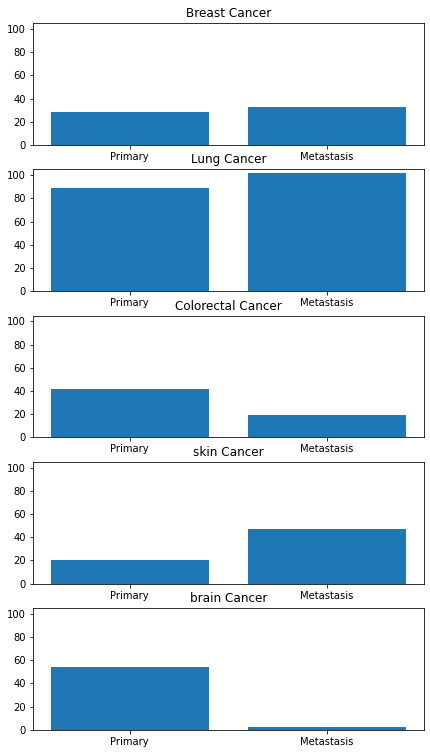

In [14]:
breast_primary_metastasis_status = np.flip(integrins_rna_breast.primary_or_metastasis.unique())
lung_primary_metastasis_status = integrins_rna_lung.primary_or_metastasis.unique()
colorectal_primary_metastasis_status = np.flip(integrins_rna_colorectal.primary_or_metastasis.unique())
skin_primary_metastasis_status = integrins_rna_skin.primary_or_metastasis.unique()
brain_primary_metastasis_status = integrins_rna_brain.primary_or_metastasis.unique()

fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(7,13))
ax[0].bar(breast_primary_metastasis_status,
          np.array([integrins_rna_breast[integrins_rna_breast.primary_or_metastasis==breast_primary_metastasis_status[0]].shape[0],
                    integrins_rna_breast[integrins_rna_breast.primary_or_metastasis==breast_primary_metastasis_status[1]].shape[0]]))
ax[0].set_title('Breast Cancer')
ax[0].set_ylim(0,105)

ax[1].bar(lung_primary_metastasis_status,
          np.array([integrins_rna_lung[integrins_rna_lung.primary_or_metastasis==lung_primary_metastasis_status[0]].shape[0],
                    integrins_rna_lung[integrins_rna_lung.primary_or_metastasis==lung_primary_metastasis_status[1]].shape[0]]))
ax[1].set_title('Lung Cancer')
ax[1].set_ylim(0,105)

ax[2].bar(colorectal_primary_metastasis_status,
          np.array([integrins_rna_colorectal[integrins_rna_colorectal.primary_or_metastasis==colorectal_primary_metastasis_status[0]].shape[0],
                    integrins_rna_colorectal[integrins_rna_colorectal.primary_or_metastasis==colorectal_primary_metastasis_status[1]].shape[0]]))
ax[2].set_title('Colorectal Cancer')
ax[2].set_ylim(0,105)

ax[3].bar(skin_primary_metastasis_status,
          np.array([integrins_rna_skin[integrins_rna_skin.primary_or_metastasis==skin_primary_metastasis_status[0]].shape[0],
                    integrins_rna_skin[integrins_rna_skin.primary_or_metastasis==skin_primary_metastasis_status[1]].shape[0]]))
ax[3].set_title('skin Cancer')
ax[3].set_ylim(0,105)

ax[4].bar(brain_primary_metastasis_status,
          np.array([integrins_rna_brain[integrins_rna_brain.primary_or_metastasis==brain_primary_metastasis_status[0]].shape[0],
                    integrins_rna_brain[integrins_rna_brain.primary_or_metastasis==brain_primary_metastasis_status[1]].shape[0]]))
ax[4].set_title('brain Cancer')
ax[4].set_ylim(0,105)




# t-sne

In [17]:
#first a little practice
iris = load_iris()
x = iris.data
y = iris.target 

In [25]:
#practice continued
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)

/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.387627
[t-SNE] KL divergence after 1000 iterations: 0.129141


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

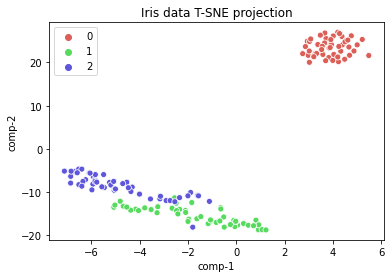

In [33]:
#practice continued
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data T-SNE projection") 

/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 159 samples in 0.000s...
[t-SNE] Computed neighbors for 159 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 159 / 159
[t-SNE] Mean sigma: 3.280770
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.378162
[t-SNE] KL divergence after 800 iterations: 0.485009


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

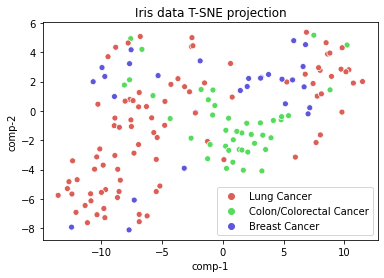

In [57]:
#Lets see if integrins alone can predict primary_disease
#this is breast, lung and colorectal
data = integrin_rna.copy()
data = data[data.primary_or_metastasis=="Primary"]
data = data[(data.primary_disease=='Breast Cancer')|(data.primary_disease=='Lung Cancer')|(data.primary_disease=='Colon/Colorectal Cancer')]
x = data.iloc[:,data.columns.str.contains("ITG")]
y = data.primary_disease


tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", len(df.y.unique())),
                data=df).set(title="data T-SNE projection") 


/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1377 samples in 0.000s...
[t-SNE] Computed neighbors for 1377 samples in 0.120s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1377
[t-SNE] Computed conditional probabilities for sample 1377 / 1377
[t-SNE] Mean sigma: 2.587031
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.364281
[t-SNE] KL divergence after 1000 iterations: 1.045525


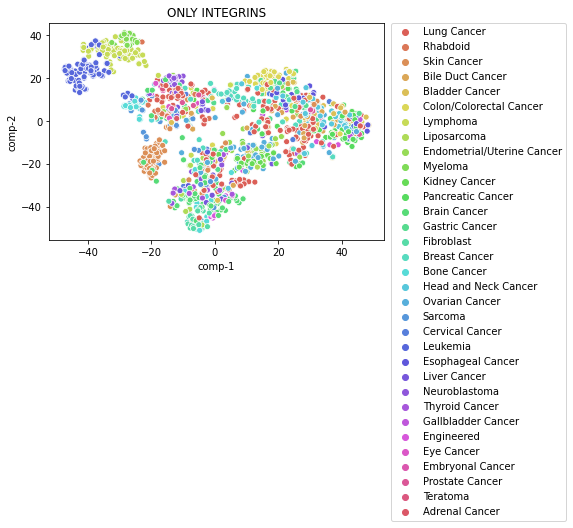

In [22]:
#Lets see if integrins alone can predict primary_disease
#this is breast, skin and colorectal
data = integrin_rna.copy()
#data = data[data.primary_or_metastasis=="Primary"]
#data = data[(data.primary_disease=='Breast Cancer')|(data.primary_disease=='Bone Cancer')|(data.primary_disease=='Prostate Cancer')|(data.primary_disease=='Liver Cancer')|(data.primary_disease=='Kidney Cancer')|(data.primary_disease=='Brain Cancer')]
x = data.iloc[:,data.columns.str.contains("ITG")]
y = data.primary_disease


tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                 palette=sns.color_palette("hls", len(df.y.unique())),
                 data=df).set(title="ONLY INTEGRINS") 

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
del data

/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1377 samples in 0.018s...
[t-SNE] Computed neighbors for 1377 samples in 0.304s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1377
[t-SNE] Computed conditional probabilities for sample 1377 / 1377
[t-SNE] Mean sigma: 45.005817
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.411171
[t-SNE] KL divergence after 1000 iterations: 0.870742
all genes


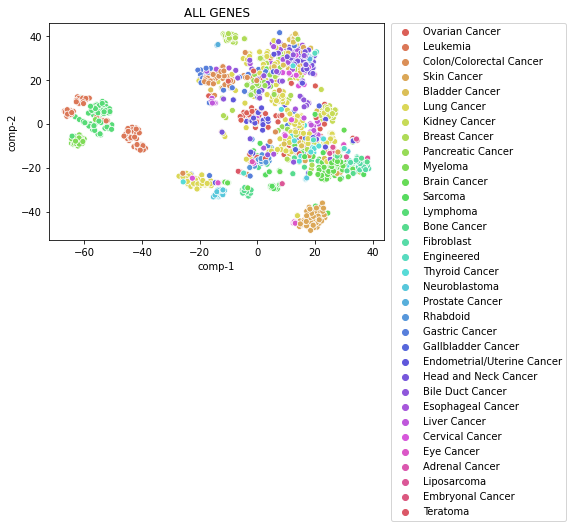

In [23]:
#Lets see if integrins alone can predict primary_disease
#this is breast, skin and colorectal
data = ccle_rna_all_genes.copy()
#data = data[data.primary_or_metastasis=="Primary"]
#data = data[(data.primary_disease=='Breast Cancer')|(data.primary_disease=='Bone Cancer')|(data.primary_disease=='Prostate Cancer')|(data.primary_disease=='Liver Cancer')|(data.primary_disease=='Kidney Cancer')|(data.primary_disease=='Brain Cancer')]
x = data.iloc[:,7:]
y = data.primary_disease


tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
print('all genes')
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                 palette=sns.color_palette("hls", len(df.y.unique())),
                 data=df).set(title="ALL GENES") 

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [10]:
ccle_rna_all_genes.iloc[:,7:]

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,ARHGAP11B (89839),AC004593.2 (1124),AC090517.4 (54816),AL160269.1 (11046),ABCF2-H2BE1 (114483834),POLR2J3 (548644),H2BE1 (114483833),AL445238.1 (647264),GET1-SH3BGR (106865373),AC113348.1 (102724657)
0,5.823495,0.000000,7.369292,2.100978,4.221877,0.042644,0.910733,5.672991,4.676380,4.013462,...,1.545968,0.189034,0.275007,0.000000,0.545968,4.424922,0.000000,0.000000,0.124328,0.000000
1,0.189034,0.000000,5.633431,1.263034,3.152183,4.189034,0.163499,4.161888,4.139961,2.799087,...,1.761285,0.000000,0.056584,0.000000,0.799087,3.748461,0.000000,0.000000,0.189034,0.000000
2,6.035624,0.084064,7.744767,1.851999,3.895303,0.000000,0.056584,6.597978,4.734981,4.141596,...,1.895303,0.344828,0.042644,0.028569,2.914565,5.350144,0.111031,0.000000,0.070389,0.000000
3,2.599318,0.000000,5.310340,2.467279,3.926948,0.918386,4.957915,3.912650,4.878725,4.971314,...,2.704872,0.286881,0.070389,0.454176,2.257011,6.182692,0.000000,0.000000,0.782409,0.000000
4,3.051372,0.000000,5.754888,2.969012,5.322289,0.214125,5.762880,4.152995,5.532629,5.330558,...,2.580145,0.454176,0.137504,0.084064,1.560715,5.469886,0.000000,0.000000,0.042644,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,5.556736,0.000000,6.861955,2.220330,2.843984,0.014355,4.788164,5.529509,4.036503,3.463361,...,1.485427,0.000000,0.176323,0.000000,2.056584,3.777157,0.000000,0.000000,0.286881,0.000000
1373,5.548128,0.344828,6.132166,3.249445,4.156235,0.000000,1.981853,5.844737,3.471187,4.622345,...,0.948601,0.014355,0.275007,0.000000,0.807355,5.042644,0.000000,0.000000,1.422233,0.000000
1374,4.052242,0.000000,6.295539,1.922198,2.364572,0.000000,1.495695,6.338424,3.768714,4.216455,...,0.176323,0.028569,0.042644,0.028569,2.456806,5.454505,0.000000,0.042644,1.454176,0.042644
1375,3.727920,0.000000,7.306335,2.833902,3.942984,0.400538,1.843984,4.697107,4.454176,4.144046,...,0.632268,0.028569,0.111031,0.028569,1.570463,4.254745,0.000000,0.000000,0.855990,0.000000


/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 460 samples in 0.006s...
[t-SNE] Computed neighbors for 460 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 460 / 460
[t-SNE] Mean sigma: 47.174422
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.879784
[t-SNE] KL divergence after 1000 iterations: 0.663997
all genes


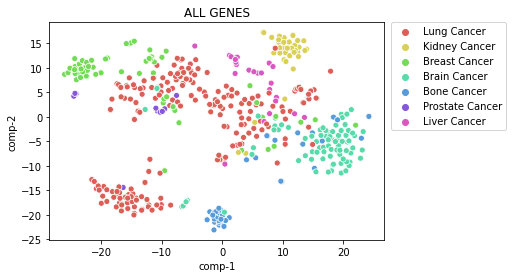

In [25]:
#Lets see if integrins alone can predict primary_disease
#this is breast, skin and colorectal
data = ccle_rna_all_genes.copy()
#data = data[data.primary_or_metastasis=="Primary"]
data = data[(data.primary_disease=='Breast Cancer')|(data.primary_disease=='Kidney Cancer')|(data.primary_disease=='Prostate Cancer')|(data.primary_disease=='Liver Cancer')|(data.primary_disease=='Brain Cancer')|(data.primary_disease=='Lung Cancer')|(data.primary_disease=='Bone Cancer')]
x = data.iloc[:,7:]
y = data.primary_disease


tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
print('all genes')
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                 palette=sns.color_palette("hls", len(df.y.unique())),
                 data=df).set(title="ALL GENES") 

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)



/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 460 samples in 0.001s...
[t-SNE] Computed neighbors for 460 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 460 / 460
[t-SNE] Mean sigma: 2.959738
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.788933
[t-SNE] KL divergence after 1000 iterations: 0.827094
all genes


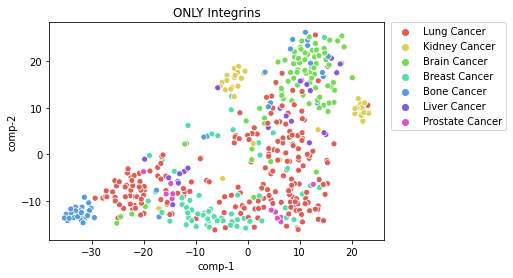

In [29]:
#Lets see if integrins alone can predict primary_disease
#this is breast, skin and colorectal
data = integrin_rna.copy()
#data = data[data.primary_or_metastasis=="Primary"]
data = data[(data.primary_disease=='Breast Cancer')|(data.primary_disease=='Kidney Cancer')|(data.primary_disease=='Prostate Cancer')|(data.primary_disease=='Liver Cancer')|(data.primary_disease=='Brain Cancer')|(data.primary_disease=='Lung Cancer')|(data.primary_disease=='Bone Cancer')]
x = data.iloc[:,data.columns.str.contains("ITG")]
y = data.primary_disease


tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
print('all genes')
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                 palette=sns.color_palette("hls", len(df.y.unique())),
                 data=df).set(title="ONLY Integrins") 

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.setp(ax.get_xticklabels(),fontsize=19)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('N',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
#ax.set_ylim(0.8,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)    


/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 438 samples in 0.006s...
[t-SNE] Computed neighbors for 438 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 438 / 438
[t-SNE] Mean sigma: 56.357274
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.729507
[t-SNE] KL divergence after 1000 iterations: 0.348693
all genes


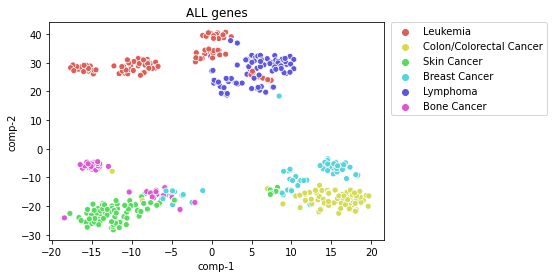

In [30]:
#Lets see if integrins alone can predict primary_disease
#this is breast, skin and colorectal
data = ccle_rna_all_genes.copy()
#data = data[data.primary_or_metastasis=="Primary"]
data = data[(data.primary_disease=='Breast Cancer')|(data.primary_disease=='Bone Cancer')|(data.primary_disease=='Colon/Colorectal Cancer')|(data.primary_disease=='Lymphoma')|(data.primary_disease=='Leukemia')|(data.primary_disease=='Skin Cancer')]
x = data.iloc[:,7:]
y = data.primary_disease

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
print('all genes')
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                 palette=sns.color_palette("hls", len(df.y.unique())),
                 data=df).set(title="ALL genes") 

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)





/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 438 samples in 0.000s...
[t-SNE] Computed neighbors for 438 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 438 / 438
[t-SNE] Mean sigma: 3.405915
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.526970
[t-SNE] KL divergence after 1000 iterations: 0.486084
all genes


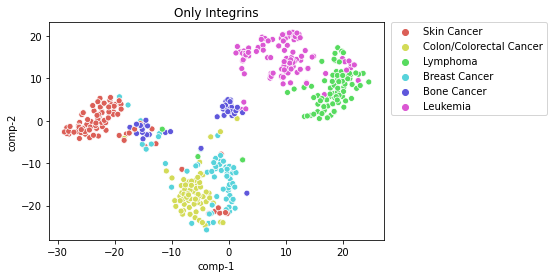

In [31]:
#Lets see if integrins alone can predict primary_disease
data = integrin_rna.copy()
#data = data[data.primary_or_metastasis=="Primary"]
data = data[(data.primary_disease=='Breast Cancer')|(data.primary_disease=='Bone Cancer')|(data.primary_disease=='Colon/Colorectal Cancer')|(data.primary_disease=='Lymphoma')|(data.primary_disease=='Leukemia')|(data.primary_disease=='Skin Cancer')]
x = data.iloc[:,data.columns.str.contains("ITG")]
y = data.primary_disease

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
print('all genes')
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                 palette=sns.color_palette("hls", len(df.y.unique())),
                 data=df).set(title="Only Integrins") 

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)





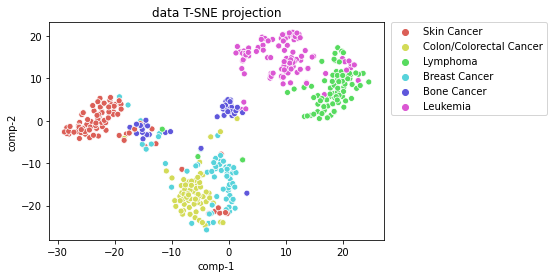

In [13]:
#do not delete

In [ ]:
#Lets see if integrins alone can predict primary_disease
#this is breast, skin and colorectal
data = integrin_rna.copy()
#data = data[data.primary_or_metastasis=="Primary"]
data = data[(data.primary_disease=='Breast Cancer')|(data.primary_disease=='Skin Cancer')|(data.primary_disease=='Colon/Colorectal Cancer')]
x = data.iloc[:,data.columns.str.contains("ITG")]
y = data.primary_disease


tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", len(df.y.unique())),
                data=df).set(title="data T-SNE projection") 


/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 191 samples in 0.000s...
[t-SNE] Computed neighbors for 191 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 191 / 191
[t-SNE] Mean sigma: 3.235541
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.768768
[t-SNE] KL divergence after 800 iterations: 0.548067


[Text(0.5, 1.0, 'data T-SNE projection')]

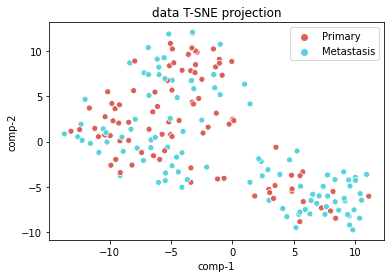

In [95]:
#Lets see if integrins alone can predict primary_or_metastasis in Lung cancer

data = integrin_rna.copy()
data = data[data.primary_disease=="Lung Cancer"]
#drop nan values
data = data.dropna(axis=0,how='any')
x = data.iloc[:,data.columns.str.contains("ITG")]
y = data.primary_or_metastasis


tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", len(df.y.unique())),
                data=df).set(title="data T-SNE projection") 


/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1028 samples in 0.000s...
[t-SNE] Computed neighbors for 1028 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1028
[t-SNE] Computed conditional probabilities for sample 1028 / 1028
[t-SNE] Mean sigma: 2.640252
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.931709
[t-SNE] KL divergence after 1000 iterations: 0.979171


[Text(0.5, 1.0, 'data T-SNE projection')]

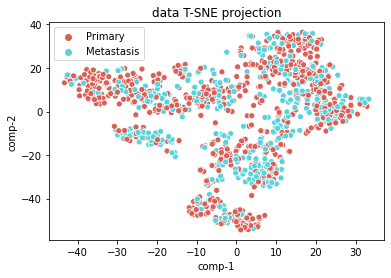

In [100]:
#Lets see if integrins alone can predict primary_or_metastasis in all cancer

data = integrin_rna.copy()

#drop nan values
data = data.dropna(axis=0,how='any')

x = data.iloc[:,data.columns.str.contains("ITG")]
y = data.primary_or_metastasis


tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", len(df.y.unique())),
                data=df).set(title="data T-SNE projection") 


/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 159 samples in 0.000s...
[t-SNE] Computed neighbors for 159 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 159 / 159
[t-SNE] Mean sigma: 3.859151
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.933575
[t-SNE] KL divergence after 1000 iterations: 0.379955


[Text(0.5, 1.0, 'data T-SNE projection')]

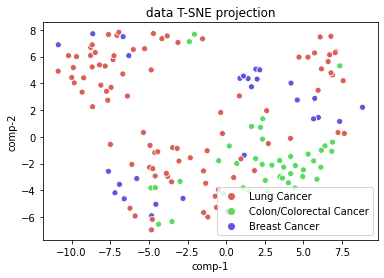

In [71]:
#Lets see if integrins + 3 markers can predict primary_disease

data = integrin_rna.copy()
data = data[data.primary_or_metastasis=="Primary"]
data = data[(data.primary_disease=='Breast Cancer')|(data.primary_disease=='Lung Cancer')|(data.primary_disease=='Colon/Colorectal Cancer')]
x = data.iloc[:,3:]
y = data.primary_disease


tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", len(df.y.unique())),
                data=df).set(title="data T-SNE projection") 


# ignore everything below this line EXCEPT the logistic regression part

# random forest with various train test splits

# also see feature importance

# 50% train-test split

The classifier Accuracy:  0.7096774193548387


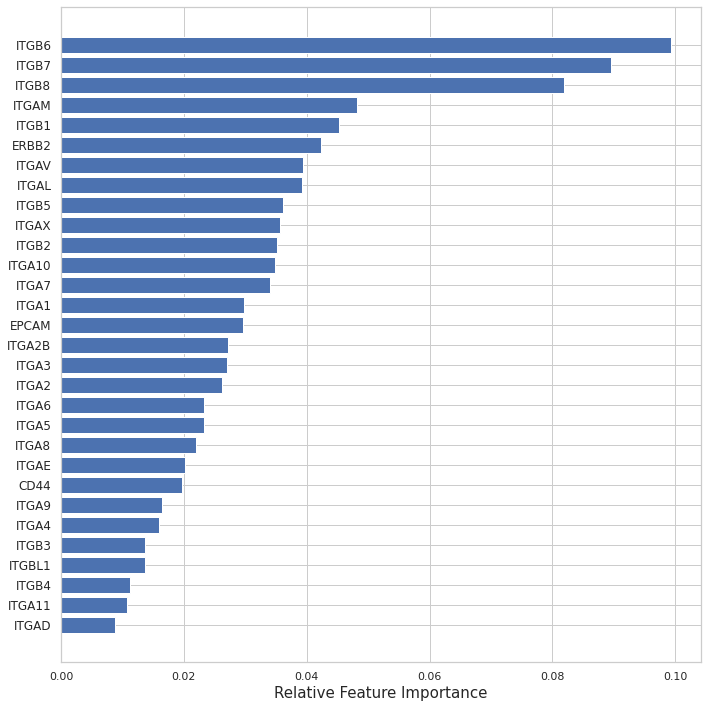

In [177]:
X=integrins_rna_breast.iloc[:,2:]
y=integrins_rna_breast['primary_or_metastasis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
feature_importances_df = pd.DataFrame({"feature": list(X.columns),"importance": classifier.feature_importances_}).sort_values("importance",ascending=False)
#print(feature_importances_df)
sorted_idx = np.argsort(feature_importances_df.importance.values)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importances_df.importance.values[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(feature_importances_df.feature.values[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance',fontsize=15)
plt.tight_layout()


# 40% test size, 60% train

The classifier Accuracy:  0.64


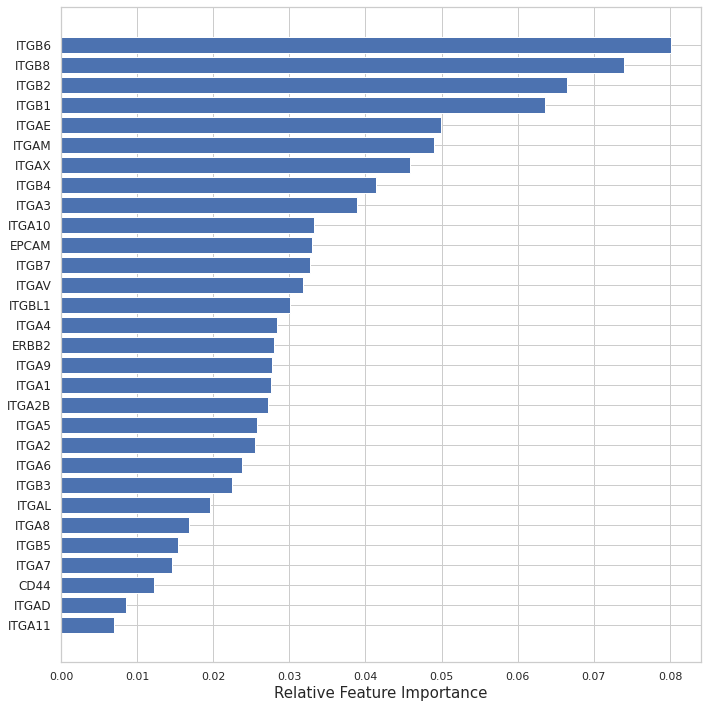

In [178]:
X=integrins_rna_breast.iloc[:,2:]
y=integrins_rna_breast['primary_or_metastasis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
feature_importances_df = pd.DataFrame({"feature": list(X.columns),"importance": classifier.feature_importances_}).sort_values("importance",ascending=False)
#print(feature_importances_df)
sorted_idx = np.argsort(feature_importances_df.importance.values)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importances_df.importance.values[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(feature_importances_df.feature.values[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance',fontsize=15)
plt.tight_layout()



# 30% test size, 70% train

The classifier Accuracy:  0.6842105263157895


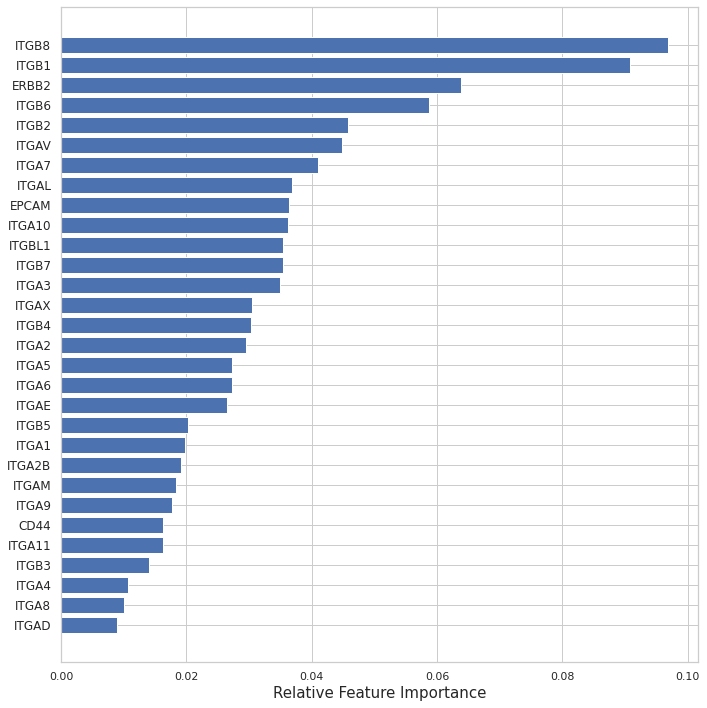

In [179]:
X=integrins_rna_breast.iloc[:,2:]
y=integrins_rna_breast['primary_or_metastasis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
feature_importances_df = pd.DataFrame({"feature": list(X.columns),"importance": classifier.feature_importances_}).sort_values("importance",ascending=False)
#print(feature_importances_df)
sorted_idx = np.argsort(feature_importances_df.importance.values)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importances_df.importance.values[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(feature_importances_df.feature.values[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance',fontsize=15)
plt.tight_layout()



# 20% test size

The classifier Accuracy:  0.6153846153846154


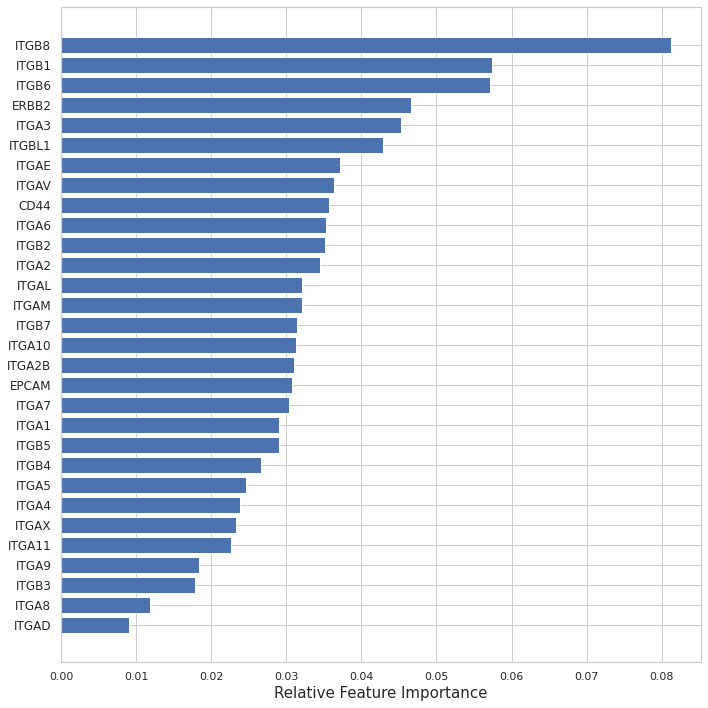

In [180]:
X=integrins_rna_breast.iloc[:,2:]
y=integrins_rna_breast['primary_or_metastasis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
feature_importances_df = pd.DataFrame({"feature": list(X.columns),"importance": classifier.feature_importances_}).sort_values("importance",ascending=False)
#print(feature_importances_df)
sorted_idx = np.argsort(feature_importances_df.importance.values)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importances_df.importance.values[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(feature_importances_df.feature.values[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance',fontsize=15)
plt.tight_layout()



In [181]:
y_test

stripped_cell_line_name
ZR7530      Metastasis
BT483          Primary
HCC1395        Primary
HCC1419        Primary
AU565       Metastasis
MDAMB468    Metastasis
CAL148      Metastasis
SUM149PT       Primary
JIMT1       Metastasis
CAMA1       Metastasis
HMC18       Metastasis
SUM159PT       Primary
DU4475      Metastasis
Name: primary_or_metastasis, dtype: object

In [182]:
y_pred

array(['Metastasis', 'Primary', 'Primary', 'Metastasis', 'Metastasis',
       'Primary', 'Metastasis', 'Metastasis', 'Primary', 'Metastasis',
       'Metastasis', 'Metastasis', 'Metastasis'], dtype=object)

# logistic regression

# breast cancer

# all features

/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator


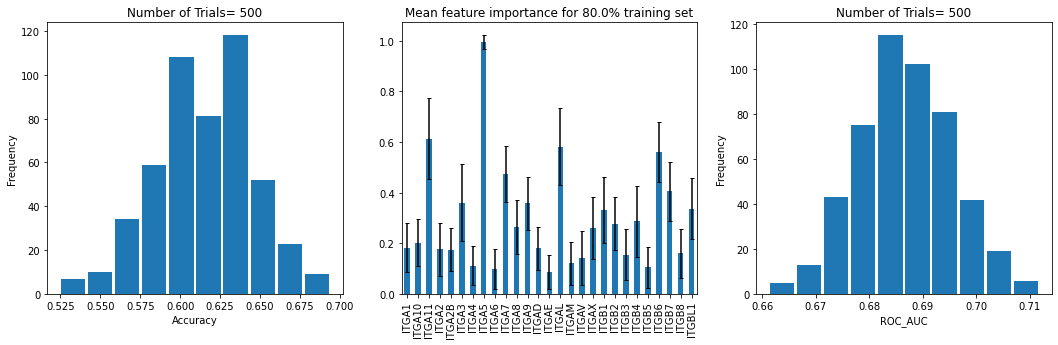

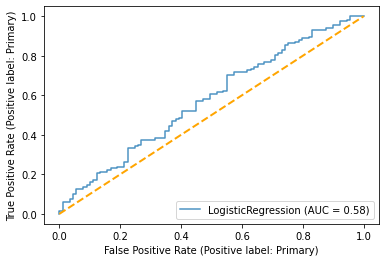

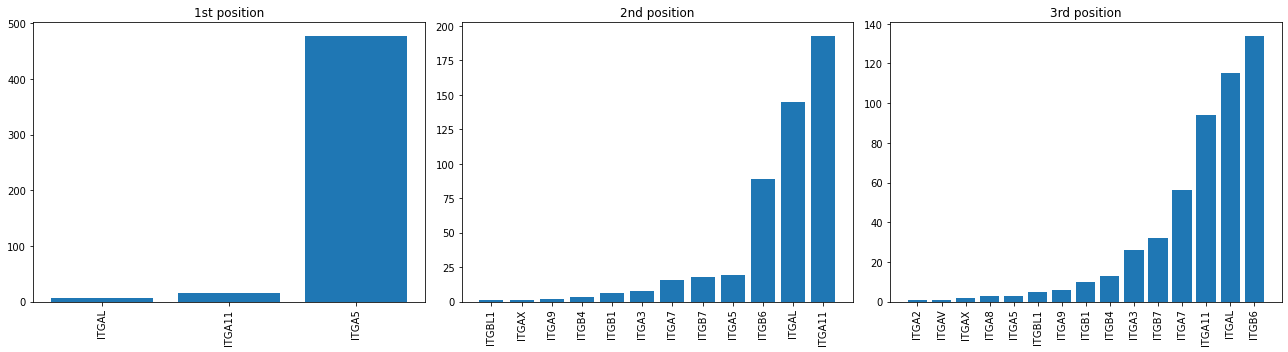

In [8]:
#meddled with this a little. carefully read.
n=500
accuracy=[]
features_importance_ascendingorder=[]
test_size=0.2
auc_roc=[]
for iteration in range(n+1):
    X=integrin_rna[integrin_rna.columns[pd.Series(integrin_rna.columns).str.startswith('ITG')]][integrin_rna['primary_or_metastasis'].notna()]
    y=integrin_rna[integrin_rna['primary_or_metastasis'].notna()]['primary_or_metastasis']
    #Scale data
    scaler = StandardScaler()
    scaler.fit(X) 
    X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size)    
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
#    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))
    auc_roc.append(roc_auc_score(y_train, classifier.predict_proba(X_train)[:,1]))    
    feature_importance = abs(classifier.coef_[0])
    feature_importance =feature_importance / feature_importance.max()
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    features_importance_ascendingorder.append(X.columns[sorted_idx])
    if iteration==0:
        features_importance_df=pd.DataFrame(data=feature_importance[sorted_idx],index=np.array(X.columns)[sorted_idx])
    else:
        features_importance_df=features_importance_df.merge(pd.DataFrame(data=feature_importance[sorted_idx],index=np.array(X.columns)[sorted_idx]),how='outer',left_index=True,right_index=True)
#below code draws a bar chart of feature importances
    #featfig = plt.figure(figsize=(10,10))
    #featax = featfig.add_subplot(1, 1, 1)
    #featax.barh(pos, feature_importance[sorted_idx], align='center')
    #featax.set_yticks(pos)
    #featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
    #featax.set_xlabel('Relative Feature Importance',fontsize=15)
    #plt.tight_layout()
# accuracy histogram
#print(features_importance_ascendingorder)
#plt.grid(visible=True,which='major',axis='both')
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,5))
ax[0].hist(accuracy,rwidth=0.9)
ax[0].set_title('Number of Trials= '+str(n),)
ax[0].set_xlabel('Accuracy')
ax[0].set_ylabel('Frequency')
features_importance_df.mean(axis=1).plot(kind='bar',yerr=features_importance_df.std(axis=1),capsize=2,ax=ax[1])
ax[1].set_title(f'Mean feature importance for {(1-test_size)*100}% training set')
ax[2].hist(auc_roc,rwidth=0.9)
ax[2].set_title('Number of Trials= '+str(n),)
ax[2].set_xlabel('ROC_AUC')
ax[2].set_ylabel('Frequency')
first_important=[]
second_important=[]
third_important=[]
RocCurveDisplay.from_estimator(classifier, X_test, y_test, alpha=0.8)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
#features
import collections
for list_ in features_importance_ascendingorder:
    first_important.append(list_[-1])
    second_important.append(list_[-2])
    third_important.append(list_[-3])
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,5))
c=collections.Counter(first_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[0].bar(c.keys(),c.values())
ax[0].set_title('1st position')
c=collections.Counter(second_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[1].bar(c.keys(),c.values())
ax[1].set_title('2nd position')
c=collections.Counter(third_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[2].bar(c.keys(),c.values())
ax[2].set_title('3rd position')
plt.draw()

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
#features_importance_df.mean(axis=1).to_clipboard(), WARNING this causes jupyter to crash
plt.tight_layout()


In [9]:
#continuation of previous cell
print(sum(accuracy)/len(accuracy))
features_importance_df.mean(axis=1).sort_values(ascending=False)

0.6138693486812786


ITGA5     0.995612
ITGA11    0.613376
ITGAL     0.582158
ITGB6     0.561497
ITGA7     0.474342
ITGB7     0.405647
ITGA3     0.361265
ITGA9     0.357691
ITGBL1    0.337679
ITGB1     0.332247
ITGB4     0.287687
ITGB2     0.278337
ITGA8     0.264008
ITGAX     0.259167
ITGA10    0.201735
ITGA1     0.182750
ITGAD     0.180111
ITGA2     0.176559
ITGA2B    0.175669
ITGB8     0.160291
ITGB3     0.155261
ITGAV     0.141572
ITGAM     0.121219
ITGA4     0.112515
ITGB5     0.105202
ITGA6     0.099227
ITGAE     0.088008
dtype: float64

['ITGB1'] [1.]


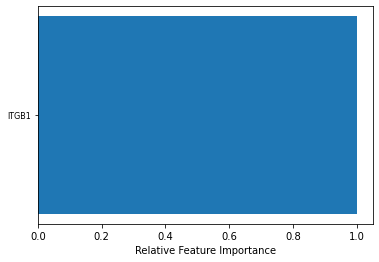

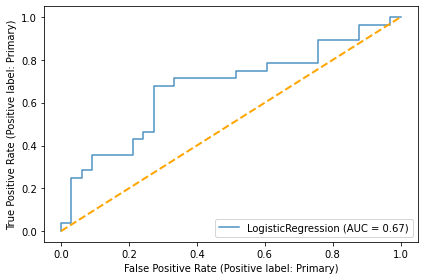

In [12]:
#continuation of previous two cells. meddled with this. this is a single instance of the logistic regression 
X=integrins_rna_breast.iloc[:,2:][['ITGB1']]
y=integrins_rna_breast['primary_or_metastasis']
#Scale data
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.01)
X_train=X_scaled
y_train=y
X_test=X_scaled
y_test=y
classifier = LogisticRegression(random_state=0,multi_class='multinomial',solver='newton-cg')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
accuracy.append(accuracy_score(y_test,y_pred))
feature_importance = abs(classifier.coef_[0])
feature_importance =feature_importance / feature_importance.max()
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
print(np.array(X.columns)[sorted_idx],feature_importance[sorted_idx])
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
RocCurveDisplay.from_estimator(classifier, X_test, y_test, alpha=0.8)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.tight_layout()   
plt.show()


In [13]:
classifier.feature_names_in_

array(['ITGB6', 'ITGB8', 'ITGB1'], dtype=object)

In [143]:
accuracy_score(y_test,y_pred)

0.8852459016393442

# breast cancer, top 4 features from above results

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator


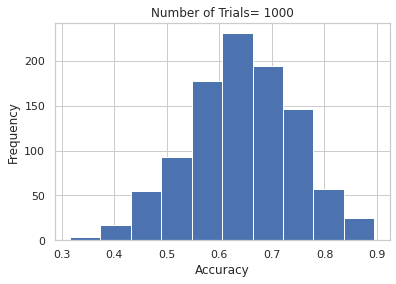

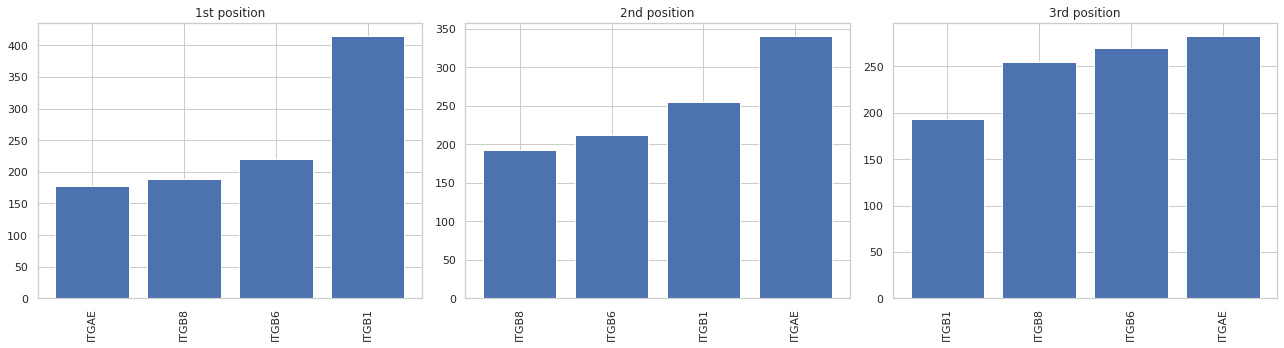

In [149]:
n=1000
accuracy=[]
features_importance_ascendingorder=[]
for iteration in range(n+1):
    X=integrins_rna_breast[['ITGB8','ITGB6','ITGB1','ITGAE']]
    y=integrins_rna_breast['primary_or_metastasis']
    #Scale data
    scaler = StandardScaler()
    scaler.fit(X) 
    X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
#    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))
    feature_importance = abs(classifier.coef_[0])
    feature_importance =feature_importance / feature_importance.max()
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    features_importance_ascendingorder.append(X.columns[sorted_idx])
#below code draws a bar chart of feature importances
    #featfig = plt.figure(figsize=(10,10))
    #featax = featfig.add_subplot(1, 1, 1)
    #featax.barh(pos, feature_importance[sorted_idx], align='center')
    #featax.set_yticks(pos)
    #featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
    #featax.set_xlabel('Relative Feature Importance',fontsize=15)
    #plt.tight_layout()
# accuracy histogram
#print(features_importance_ascendingorder)
plt.hist(accuracy)
plt.title('Number of Trials= '+str(n),)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
first_important=[]
second_important=[]
third_important=[]
#features
import collections
for list_ in features_importance_ascendingorder:
    first_important.append(list_[-1])
    second_important.append(list_[-2])
    third_important.append(list_[-3])
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,5))
c=collections.Counter(first_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[0].bar(c.keys(),c.values())
ax[0].set_title('1st position')
c=collections.Counter(second_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[1].bar(c.keys(),c.values())
ax[1].set_title('2nd position')
c=collections.Counter(third_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[2].bar(c.keys(),c.values())
ax[2].set_title('3rd position')
plt.draw()

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
plt.tight_layout()


# breast cancer, training entire dataset

/home/hshadman/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The classifier Accuracy:  0.8852459016393442


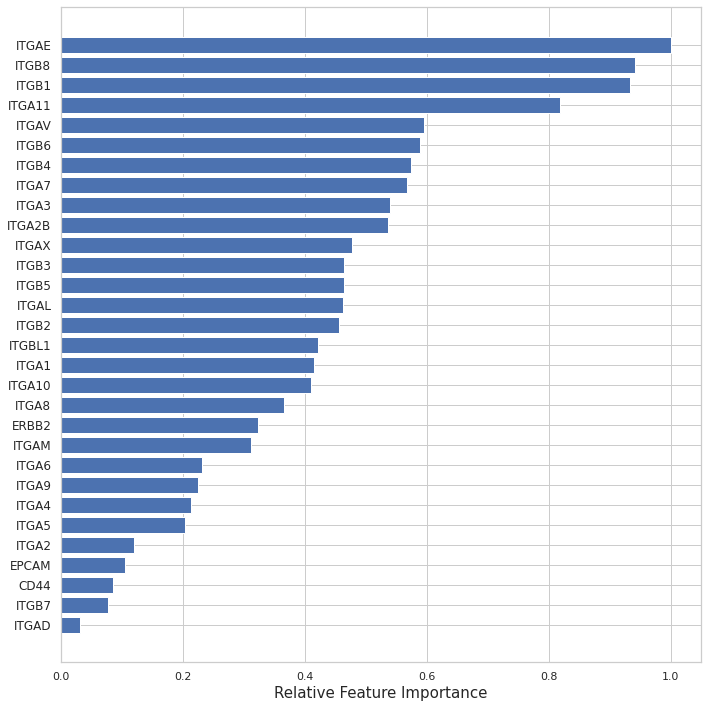

In [45]:
X=integrins_rna_breast.iloc[:,2:]#[['ITGB8','ITGB6','ITGB1','ITGAE']]
y=integrins_rna_breast['primary_or_metastasis']
#Scale data
#scaler = StandardScaler()
#scaler.fit(X) 
#X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.0)
classifier = LogisticRegression(random_state=0)
classifier.fit(X, y)
y_pred = classifier.predict(X)
print("The classifier Accuracy: ", accuracy_score(y,y_pred))
feature_importance = abs(classifier.coef_[0])
feature_importance =feature_importance / feature_importance.max()
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
features_importance_ascendingorder.append(X.columns[sorted_idx])
#below code draws a bar chart of feature importances
featfig = plt.figure(figsize=(10,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance',fontsize=15)
plt.tight_layout()


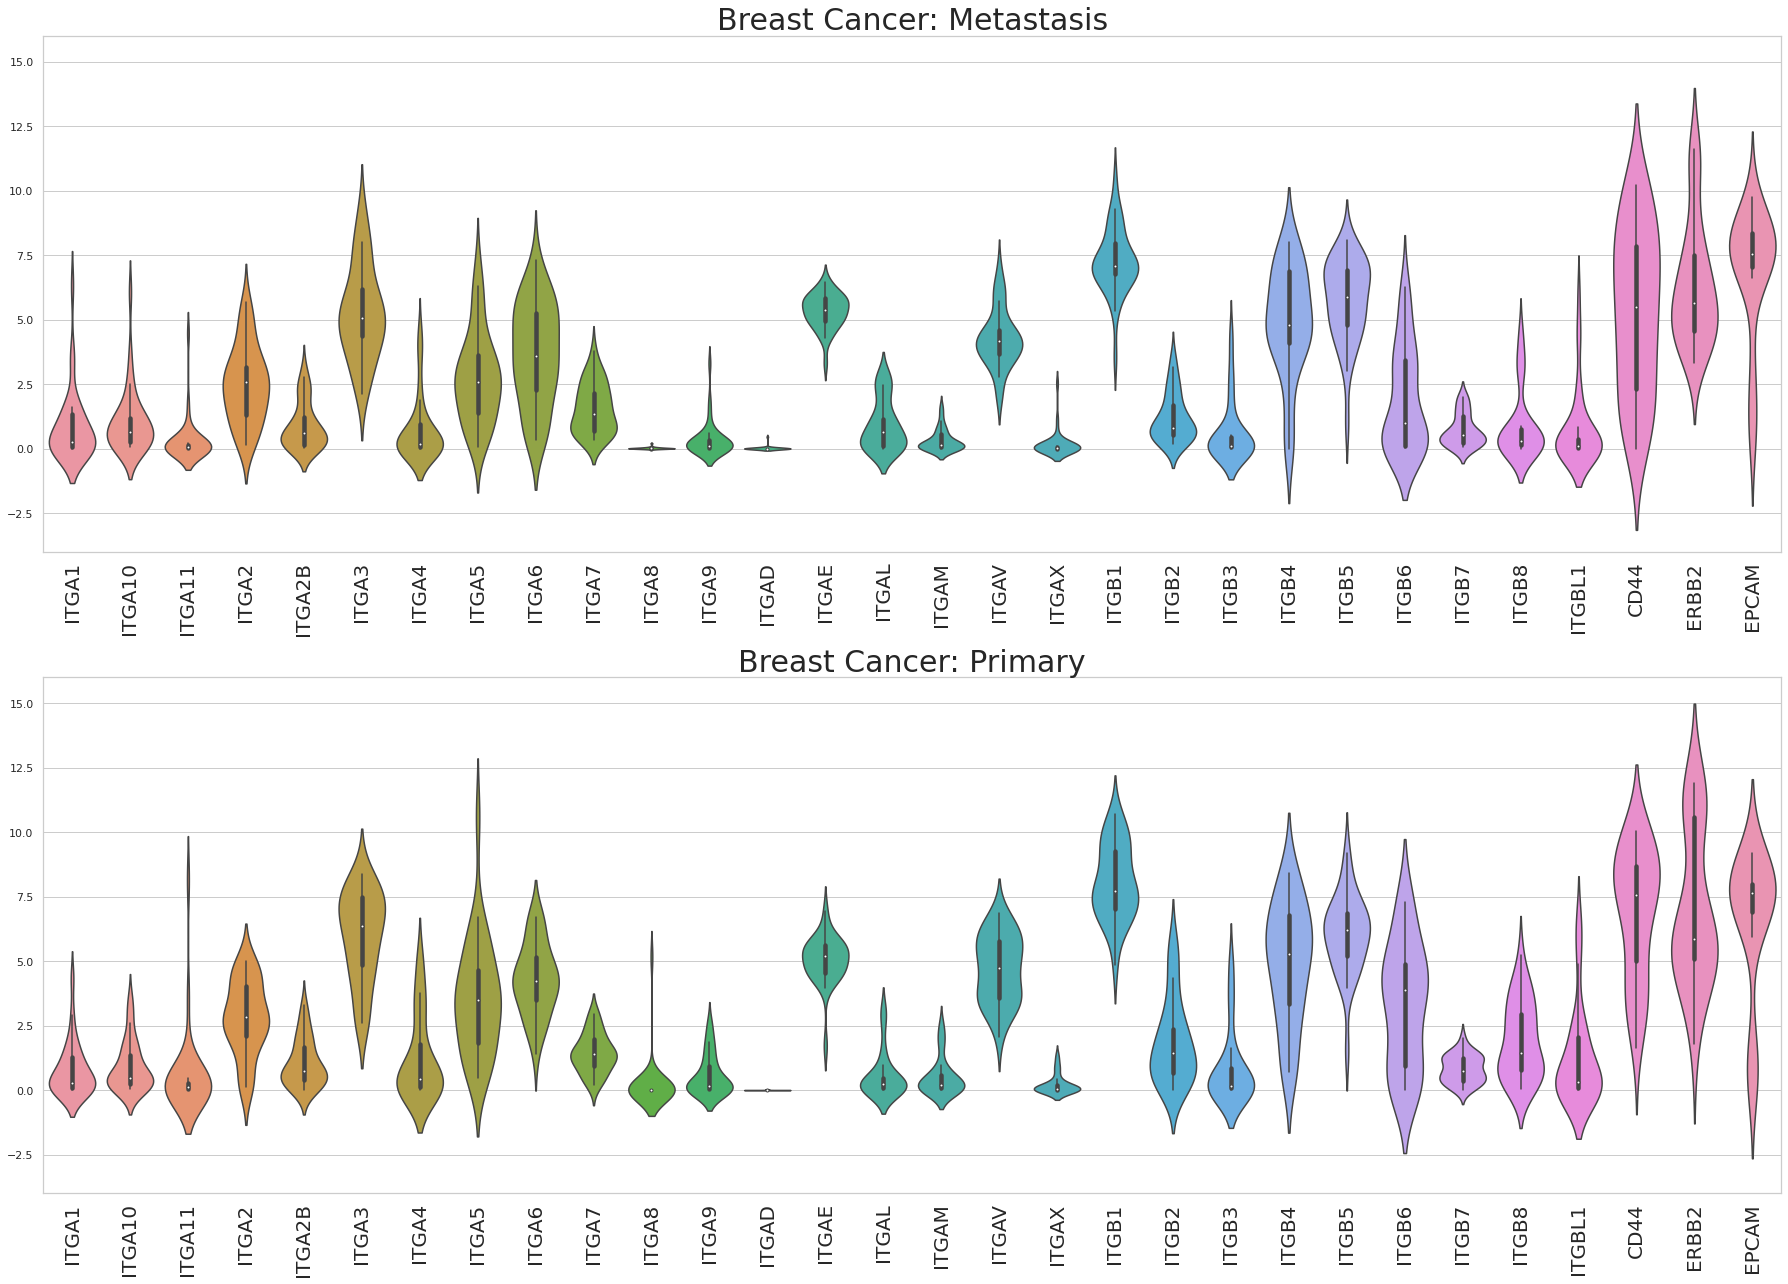

In [137]:
fig, axes = plt.subplots(nrows=len(integrins_rna_breast.primary_or_metastasis.unique()),ncols=1,figsize=(25,18))
j=0
for cancer_status in integrins_rna_breast.primary_or_metastasis.unique():
    sns.set(style="whitegrid")
    ax=sns.violinplot(data=integrins_rna_breast[integrins_rna_breast.primary_or_metastasis==cancer_status].iloc[:,2:],
                   scale='width',
                 ax=axes[j])
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=20)
    axes[j].set_ylim(-4,16)
    axes[j].set_title(integrins_rna_breast.primary_disease.unique()[0]+': '+str(cancer_status),fontsize=30)
    j+=1
plt.tight_layout()


# lung cancer, all features included

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator


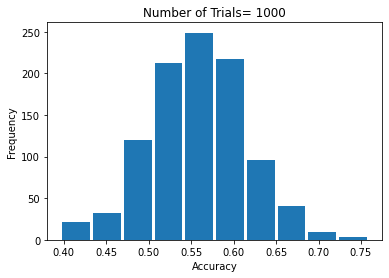

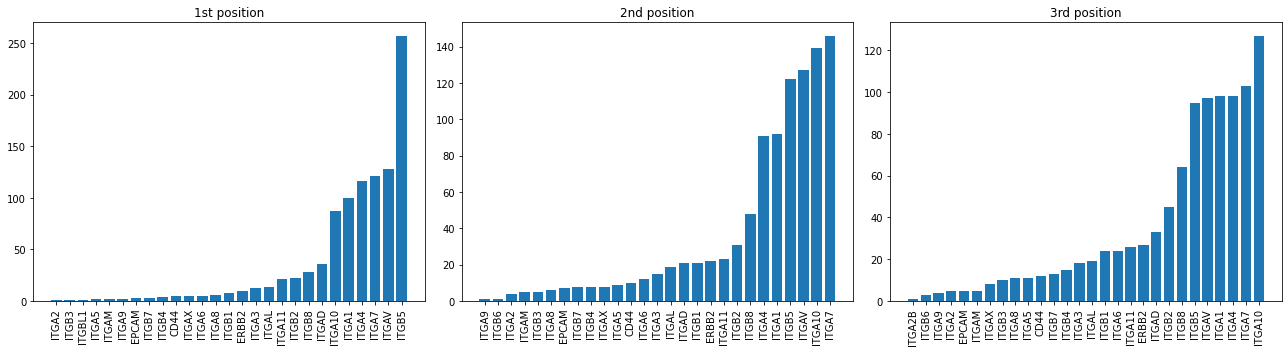

In [54]:
n=1000
accuracy=[]
features_importance_ascendingorder=[]
for iteration in range(n+1):
    X=integrins_rna_lung.iloc[:,2:]
    y=integrins_rna_lung['primary_or_metastasis']
    #Scale data
    scaler = StandardScaler()
    scaler.fit(X) 
    X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
#    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))
    feature_importance = abs(classifier.coef_[0])
    feature_importance =feature_importance / feature_importance.max()
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    features_importance_ascendingorder.append(X.columns[sorted_idx])
#below code draws a bar chart of feature importances
    #featfig = plt.figure(figsize=(10,10))
    #featax = featfig.add_subplot(1, 1, 1)
    #featax.barh(pos, feature_importance[sorted_idx], align='center')
    #featax.set_yticks(pos)
    #featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
    #featax.set_xlabel('Relative Feature Importance',fontsize=15)
    #plt.tight_layout()
# accuracy histogram
#print(features_importance_ascendingorder)
plt.hist(accuracy,rwidth=0.9)
plt.title('Number of Trials= '+str(n),)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
first_important=[]
second_important=[]
third_important=[]
#features
import collections
for list_ in features_importance_ascendingorder:
    first_important.append(list_[-1])
    second_important.append(list_[-2])
    third_important.append(list_[-3])
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,5))
c=collections.Counter(first_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[0].bar(c.keys(),c.values())
ax[0].set_title('1st position')
c=collections.Counter(second_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[1].bar(c.keys(),c.values())
ax[1].set_title('2nd position')
c=collections.Counter(third_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[2].bar(c.keys(),c.values())
ax[2].set_title('3rd position')
plt.draw()

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
plt.tight_layout()


# lung cancer, top 4 features from above results

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator


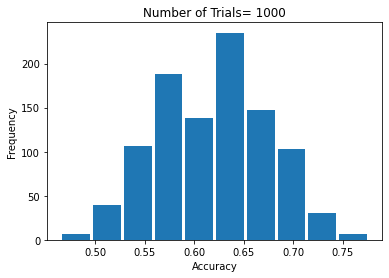

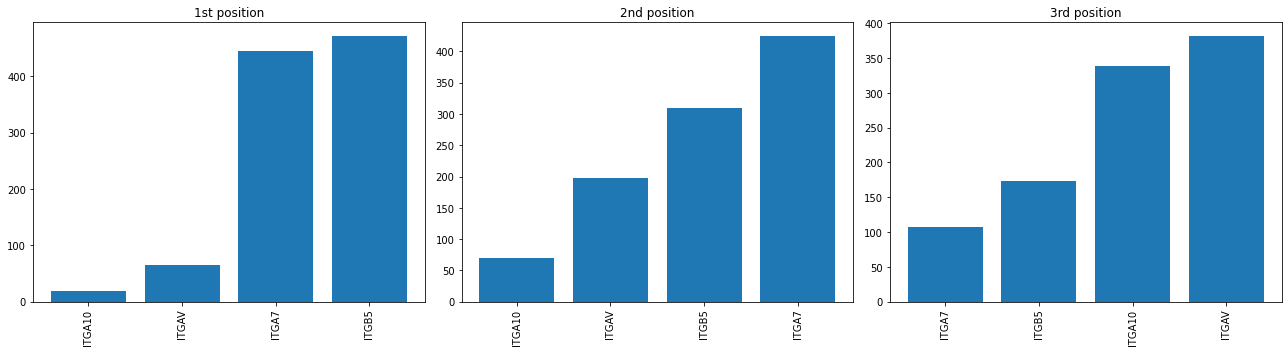

In [56]:
n=1000
accuracy=[]
features_importance_ascendingorder=[]
for iteration in range(n+1):
    X=integrins_rna_lung[['ITGB5','ITGAV','ITGA10','ITGA7']]
    y=integrins_rna_lung['primary_or_metastasis']
    #Scale data
    scaler = StandardScaler()
    scaler.fit(X) 
    X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
#    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))
    feature_importance = abs(classifier.coef_[0])
    feature_importance =feature_importance / feature_importance.max()
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    features_importance_ascendingorder.append(X.columns[sorted_idx])
#below code draws a bar chart of feature importances
    #featfig = plt.figure(figsize=(10,10))
    #featax = featfig.add_subplot(1, 1, 1)
    #featax.barh(pos, feature_importance[sorted_idx], align='center')
    #featax.set_yticks(pos)
    #featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
    #featax.set_xlabel('Relative Feature Importance',fontsize=15)
    #plt.tight_layout()
# accuracy histogram
#print(features_importance_ascendingorder)
plt.hist(accuracy,rwidth=0.9)
plt.title('Number of Trials= '+str(n),)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
first_important=[]
second_important=[]
third_important=[]
#features
import collections
for list_ in features_importance_ascendingorder:
    first_important.append(list_[-1])
    second_important.append(list_[-2])
    third_important.append(list_[-3])
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,5))
c=collections.Counter(first_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[0].bar(c.keys(),c.values())
ax[0].set_title('1st position')
c=collections.Counter(second_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[1].bar(c.keys(),c.values())
ax[1].set_title('2nd position')
c=collections.Counter(third_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[2].bar(c.keys(),c.values())
ax[2].set_title('3rd position')
plt.draw()

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
plt.tight_layout()


# lung cancer, training entire dataset

/home/hshadman/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The classifier Accuracy:  0.7068062827225131


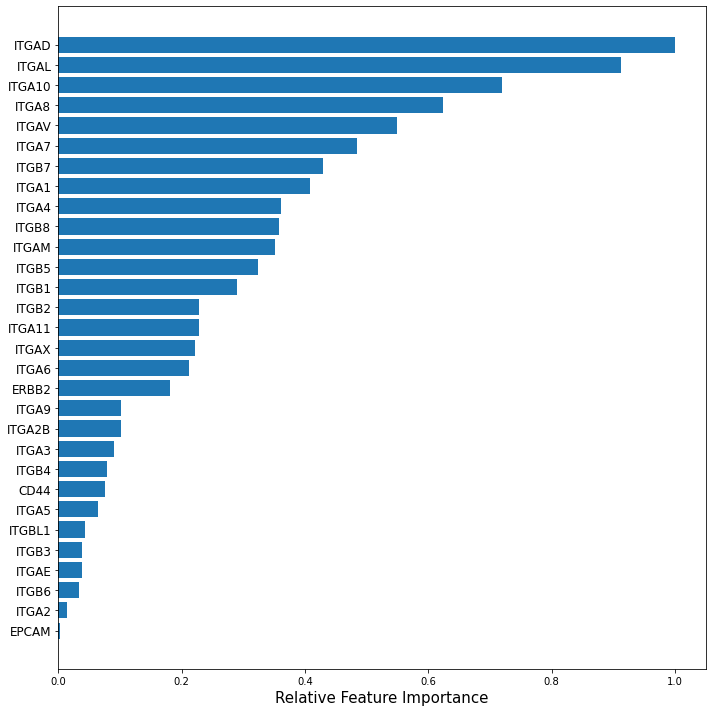

In [57]:
X=integrins_rna_lung.iloc[:,2:]
y=integrins_rna_lung['primary_or_metastasis']
#Scale data
#scaler = StandardScaler()
#scaler.fit(X) 
#X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.0)
classifier = LogisticRegression(random_state=0)
classifier.fit(X, y)
y_pred = classifier.predict(X)
print("The classifier Accuracy: ", accuracy_score(y,y_pred))
feature_importance = abs(classifier.coef_[0])
feature_importance =feature_importance / feature_importance.max()
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
features_importance_ascendingorder.append(X.columns[sorted_idx])
#below code draws a bar chart of feature importances
featfig = plt.figure(figsize=(10,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance',fontsize=15)
plt.tight_layout()


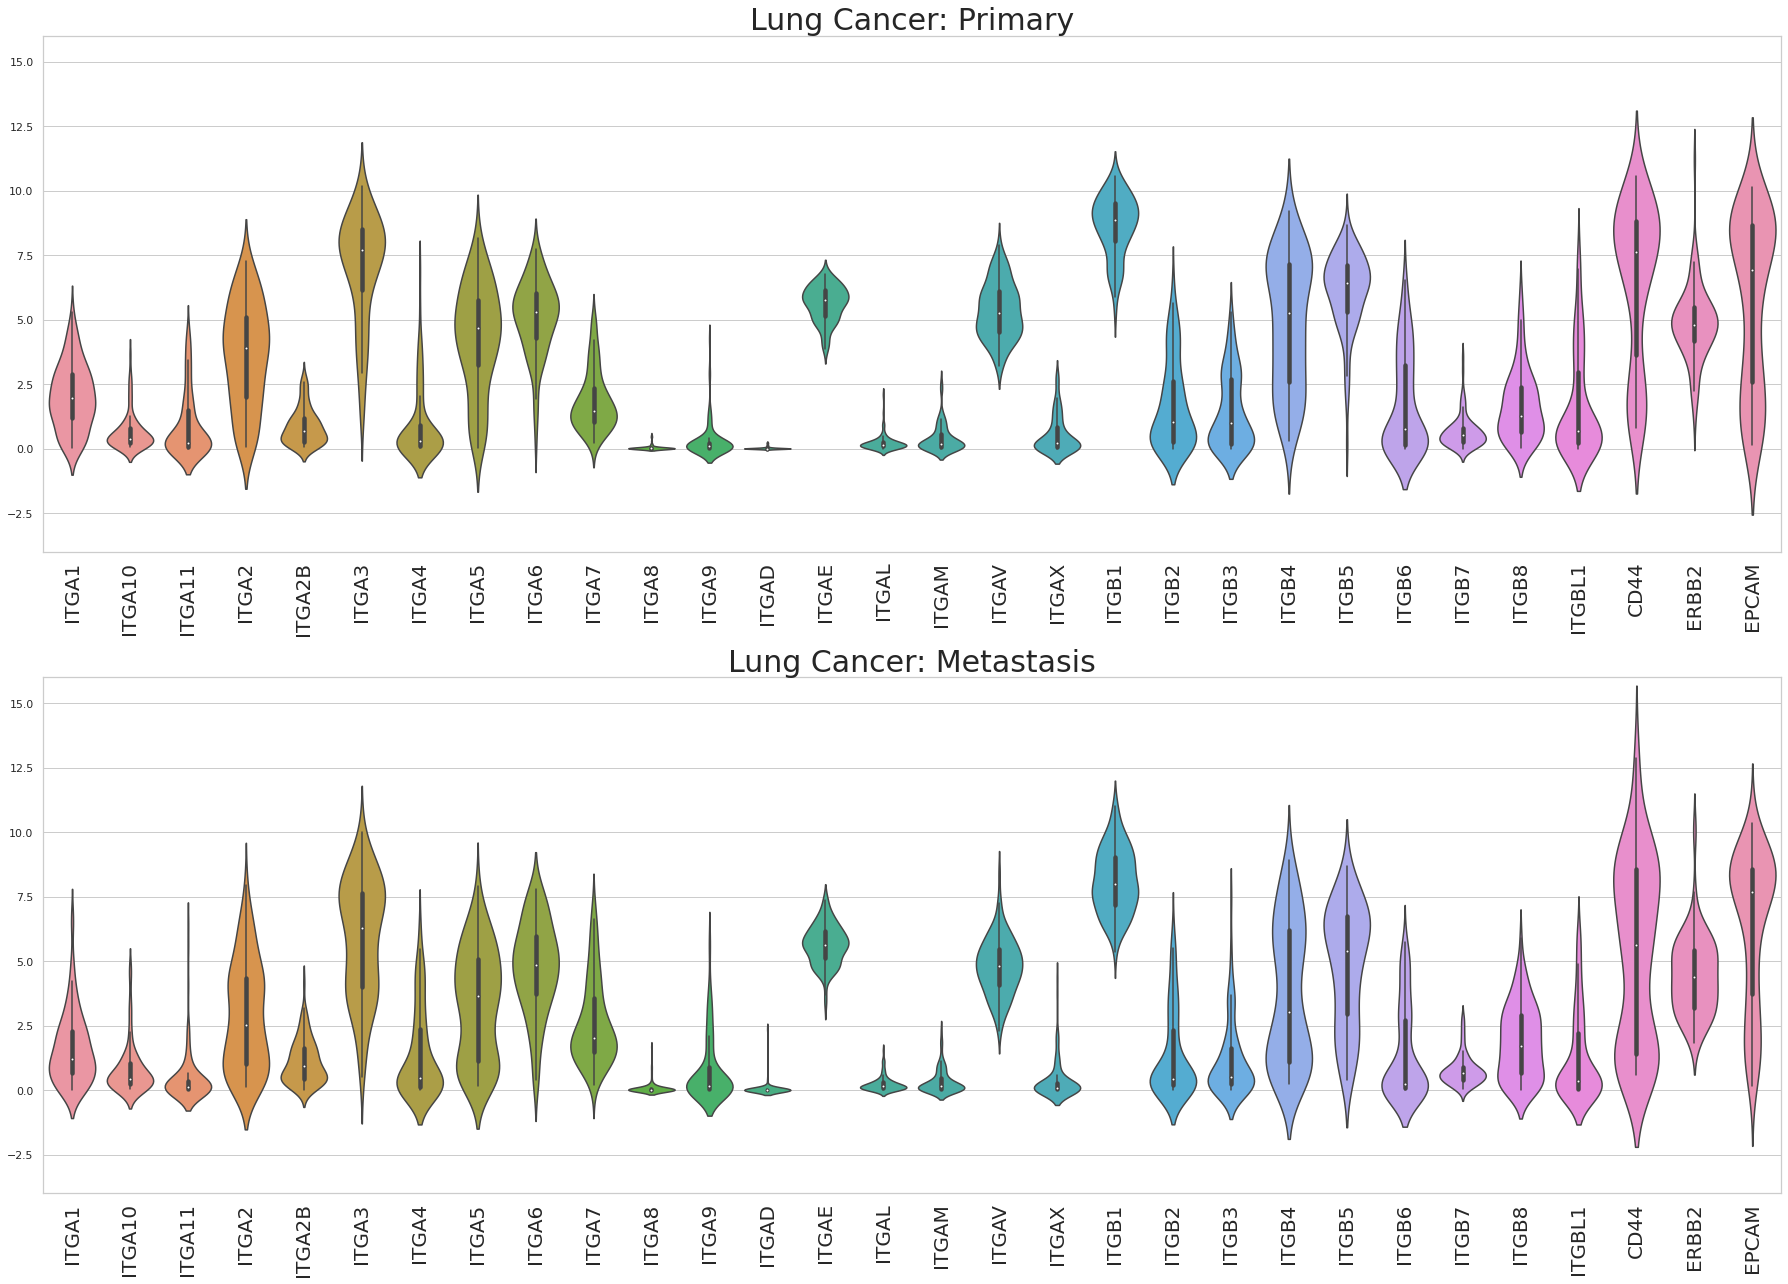

In [138]:
fig, axes = plt.subplots(nrows=len(integrins_rna_lung.primary_or_metastasis.unique()),ncols=1,figsize=(25,18))
j=0
for cancer_status in integrins_rna_lung.primary_or_metastasis.unique():
    sns.set(style="whitegrid")
    ax=sns.violinplot(data=integrins_rna_lung[integrins_rna_lung.primary_or_metastasis==cancer_status].iloc[:,2:],
                   scale='width',
                 ax=axes[j])
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=20)
    axes[j].set_ylim(-4,16)
    axes[j].set_title(integrins_rna_lung.primary_disease.unique()[0]+': '+str(cancer_status),fontsize=30)
    j+=1
plt.tight_layout()


# colorectal cancer, all features included

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator


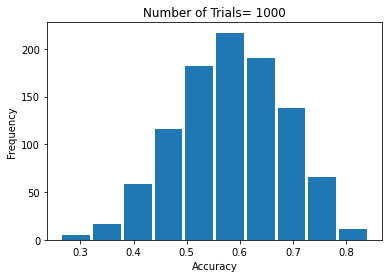

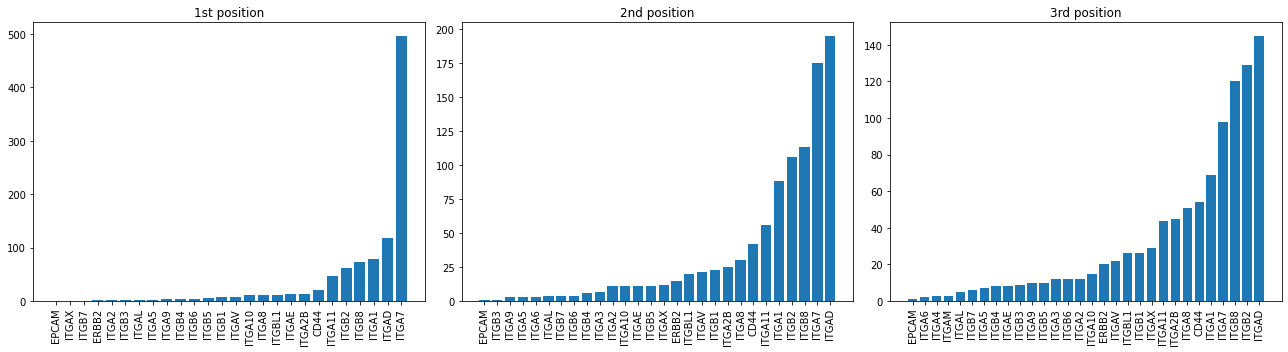

In [113]:
n=1000
accuracy=[]
features_importance_ascendingorder=[]
for iteration in range(n+1):
    X=integrins_rna_colorectal.iloc[:,2:]
    y=integrins_rna_colorectal['primary_or_metastasis']
    #Scale data
    scaler = StandardScaler()
    scaler.fit(X) 
    X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
#    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))
    feature_importance = abs(classifier.coef_[0])
    feature_importance =feature_importance / feature_importance.max()
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    features_importance_ascendingorder.append(X.columns[sorted_idx])
#below code draws a bar chart of feature importances
    #featfig = plt.figure(figsize=(10,10))
    #featax = featfig.add_subplot(1, 1, 1)
    #featax.barh(pos, feature_importance[sorted_idx], align='center')
    #featax.set_yticks(pos)
    #featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
    #featax.set_xlabel('Relative Feature Importance',fontsize=15)
    #plt.tight_layout()
# accuracy histogram
#print(features_importance_ascendingorder)
plt.hist(accuracy,rwidth=0.9)
plt.title('Number of Trials= '+str(n),)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
first_important=[]
second_important=[]
third_important=[]
#features
import collections
for list_ in features_importance_ascendingorder:
    first_important.append(list_[-1])
    second_important.append(list_[-2])
    third_important.append(list_[-3])
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,5))
c=collections.Counter(first_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[0].bar(c.keys(),c.values())
ax[0].set_title('1st position')
c=collections.Counter(second_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[1].bar(c.keys(),c.values())
ax[1].set_title('2nd position')
c=collections.Counter(third_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[2].bar(c.keys(),c.values())
ax[2].set_title('3rd position')
plt.draw()

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
plt.tight_layout()


# colorectal cancer, top 3 features from above results

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator


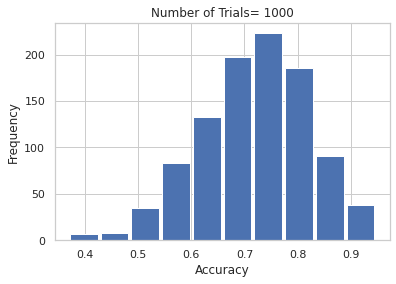

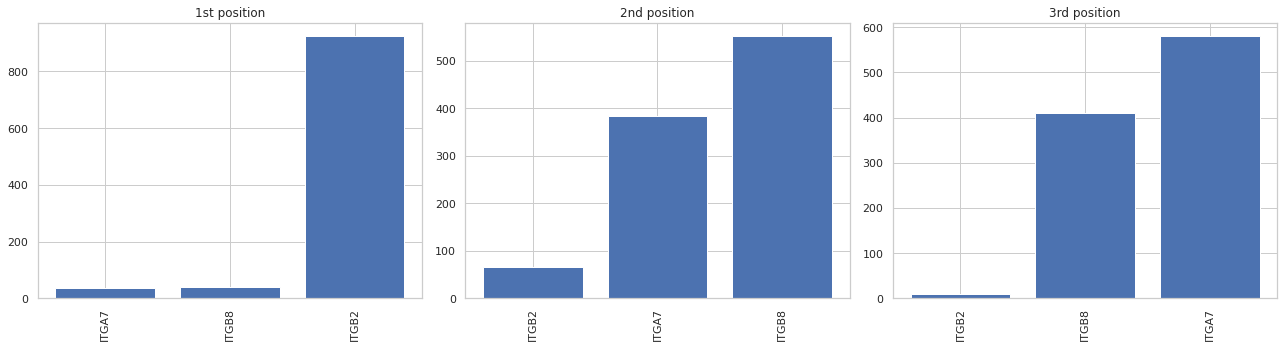

In [141]:
n=1000
accuracy=[]
features_importance_ascendingorder=[]
for iteration in range(n+1):
    X=integrins_rna_colorectal[['ITGB2','ITGB8','ITGA7']]
    y=integrins_rna_colorectal['primary_or_metastasis']
    #Scale data
    scaler = StandardScaler()
    scaler.fit(X) 
    X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
#    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))
    feature_importance = abs(classifier.coef_[0])
    feature_importance =feature_importance / feature_importance.max()
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    features_importance_ascendingorder.append(X.columns[sorted_idx])
#below code draws a bar chart of feature importances
    #featfig = plt.figure(figsize=(10,10))
    #featax = featfig.add_subplot(1, 1, 1)
    #featax.barh(pos, feature_importance[sorted_idx], align='center')
    #featax.set_yticks(pos)
    #featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
    #featax.set_xlabel('Relative Feature Importance',fontsize=15)
    #plt.tight_layout()
# accuracy histogram
#print(features_importance_ascendingorder)
plt.hist(accuracy,rwidth=0.9)
plt.title('Number of Trials= '+str(n),)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
first_important=[]
second_important=[]
third_important=[]
#features
import collections
for list_ in features_importance_ascendingorder:
    first_important.append(list_[-1])
    second_important.append(list_[-2])
    third_important.append(list_[-3])
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,5))
c=collections.Counter(first_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[0].bar(c.keys(),c.values())
ax[0].set_title('1st position')
c=collections.Counter(second_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[1].bar(c.keys(),c.values())
ax[1].set_title('2nd position')
c=collections.Counter(third_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[2].bar(c.keys(),c.values())
ax[2].set_title('3rd position')
plt.draw()

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
plt.tight_layout()


/home/hshadman/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The classifier Accuracy:  0.8032786885245902


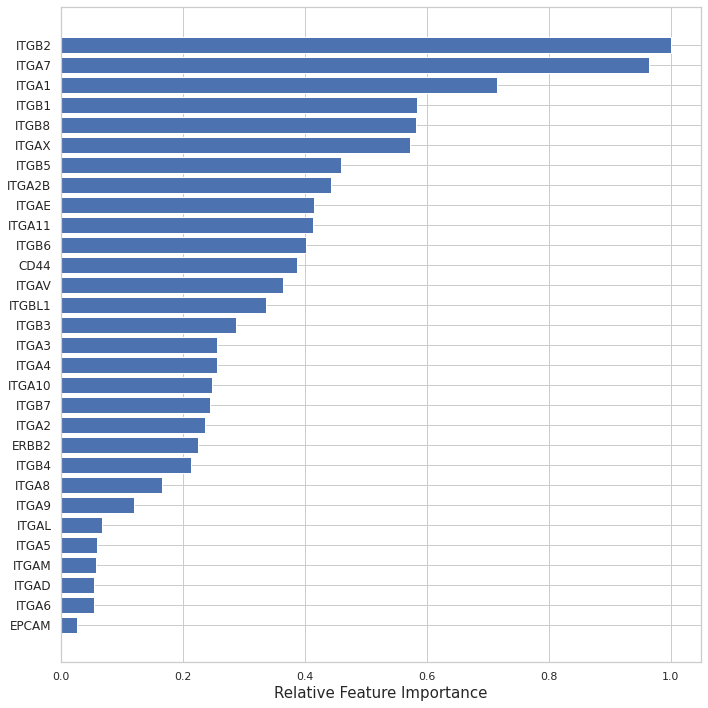

In [140]:
X=integrins_rna_colorectal.iloc[:,2:]
y=integrins_rna_colorectal['primary_or_metastasis']
#Scale data
#scaler = StandardScaler()
#scaler.fit(X) 
#X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.0)
classifier = LogisticRegression(random_state=0)
classifier.fit(X, y)
y_pred = classifier.predict(X)
print("The classifier Accuracy: ", accuracy_score(y,y_pred))
feature_importance = abs(classifier.coef_[0])
feature_importance =feature_importance / feature_importance.max()
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
features_importance_ascendingorder.append(X.columns[sorted_idx])
#below code draws a bar chart of feature importances
featfig = plt.figure(figsize=(10,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance',fontsize=15)
plt.tight_layout()


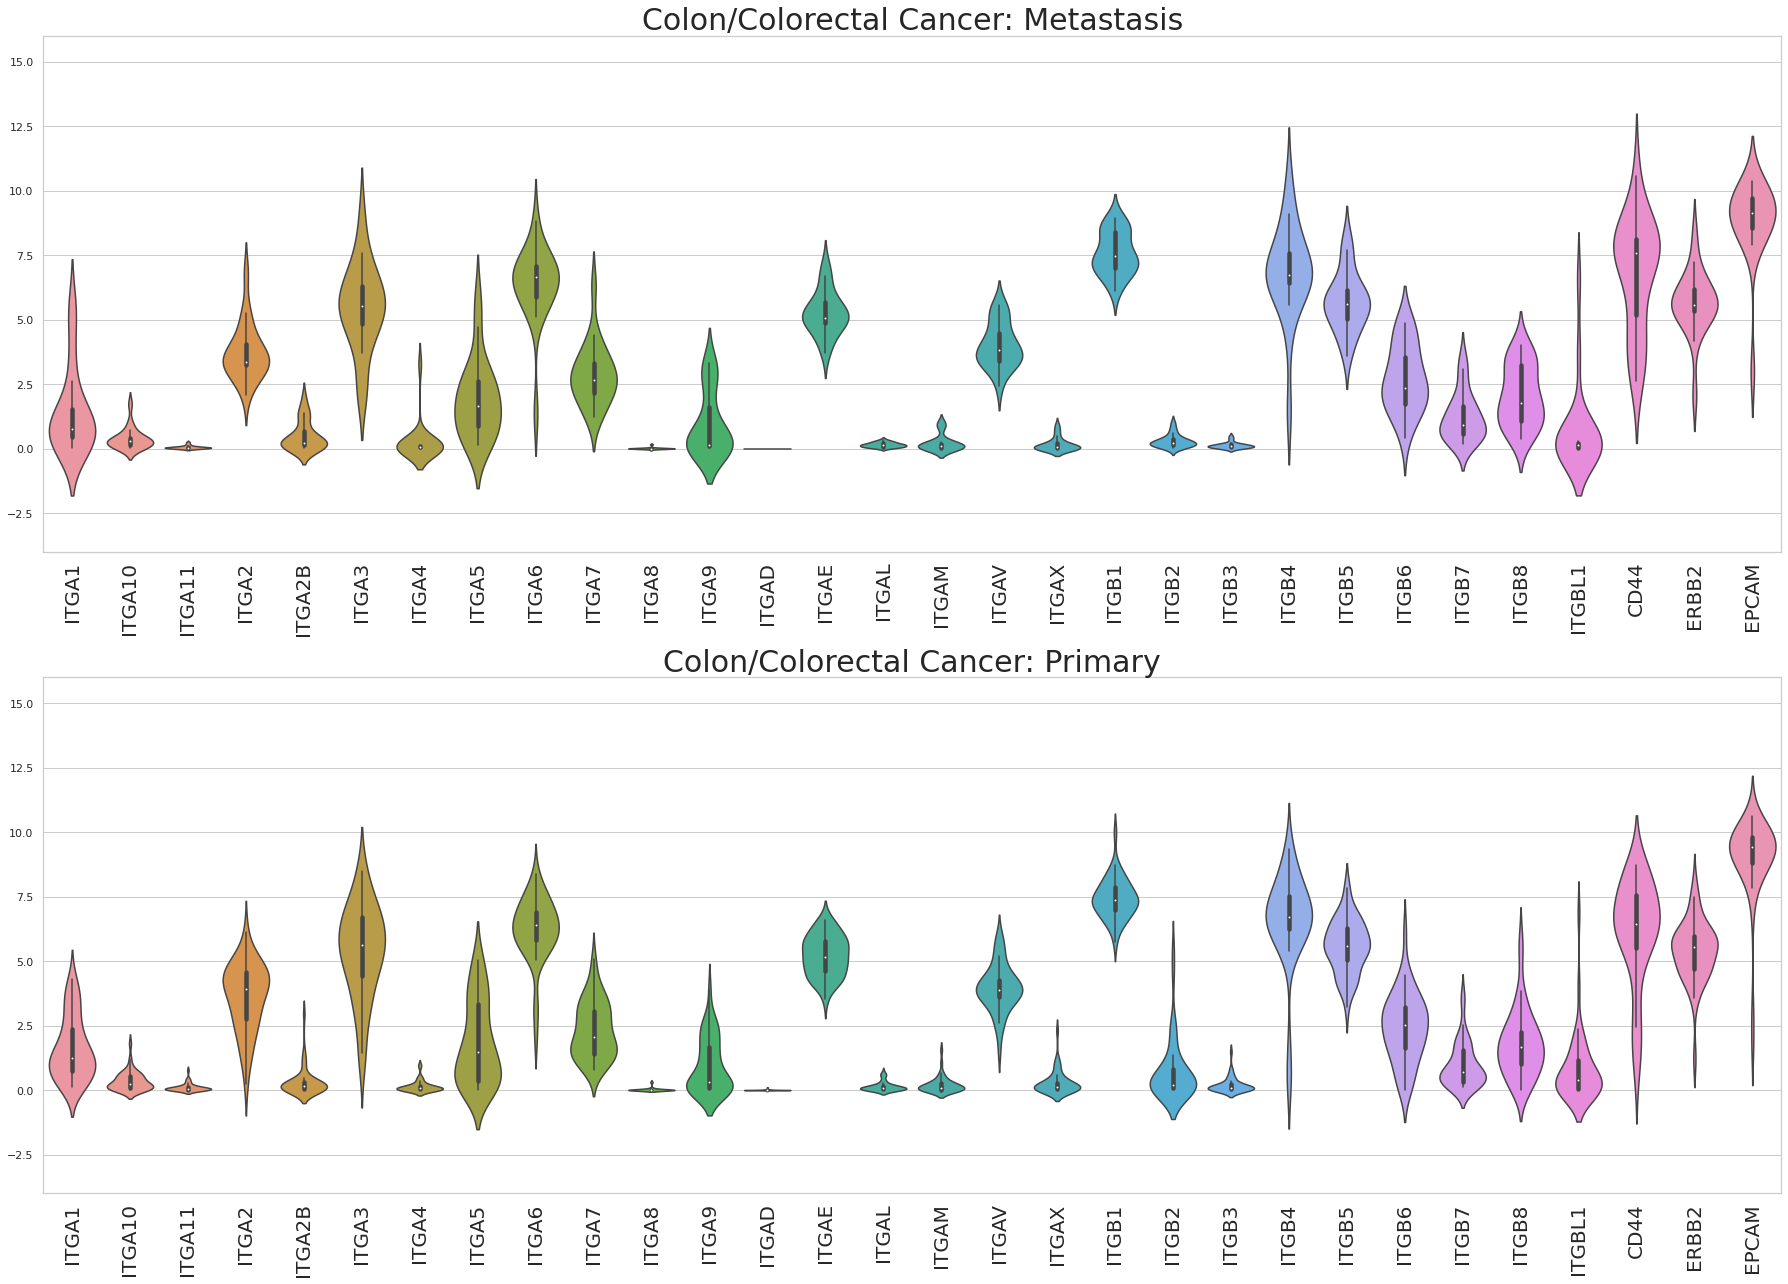

In [139]:
fig, axes = plt.subplots(nrows=len(integrins_rna_colorectal.primary_or_metastasis.unique()),ncols=1,figsize=(25,18))
j=0
for cancer_status in integrins_rna_colorectal.primary_or_metastasis.unique():
    sns.set(style="whitegrid")
    ax=sns.violinplot(data=integrins_rna_colorectal[integrins_rna_colorectal.primary_or_metastasis==cancer_status].iloc[:,2:],
                   scale='width',
                 ax=axes[j])
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=20)
    axes[j].set_ylim(-4,16)
    axes[j].set_title(integrins_rna_colorectal.primary_disease.unique()[0]+': '+str(cancer_status),fontsize=30)
    j+=1
plt.tight_layout()


# Skin cancer, all features

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator


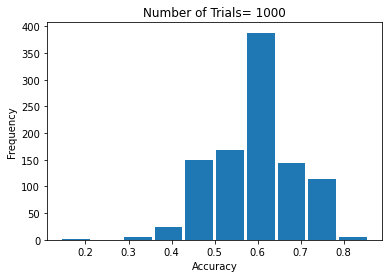

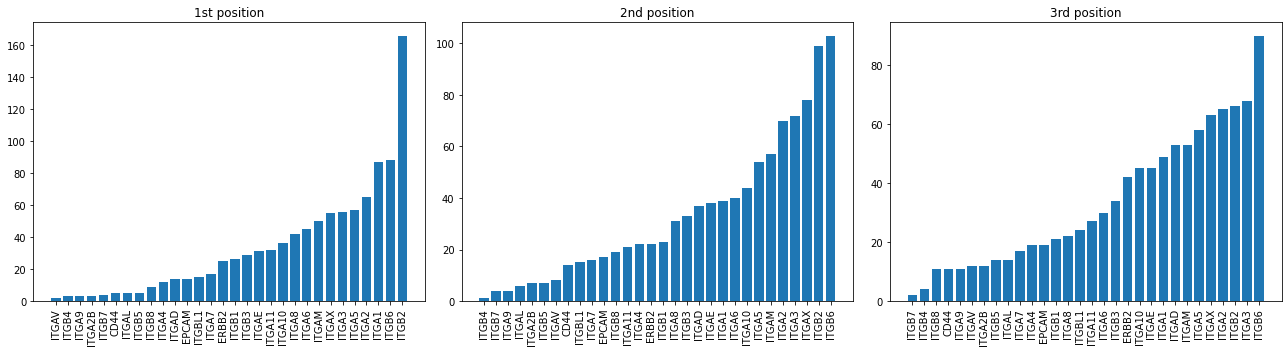

In [18]:
n=1000
accuracy=[]
features_importance_ascendingorder=[]
for iteration in range(n+1):
    X=integrins_rna_skin.iloc[:,2:]
    y=integrins_rna_skin['primary_or_metastasis']
    #Scale data
    scaler = StandardScaler()
    scaler.fit(X) 
    X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
#    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))
    feature_importance = abs(classifier.coef_[0])
    feature_importance =feature_importance / feature_importance.max()
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    features_importance_ascendingorder.append(X.columns[sorted_idx])
#below code draws a bar chart of feature importances
    #featfig = plt.figure(figsize=(10,10))
    #featax = featfig.add_subplot(1, 1, 1)
    #featax.barh(pos, feature_importance[sorted_idx], align='center')
    #featax.set_yticks(pos)
    #featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
    #featax.set_xlabel('Relative Feature Importance',fontsize=15)
    #plt.tight_layout()
# accuracy histogram
#print(features_importance_ascendingorder)
plt.hist(accuracy,rwidth=0.9)
plt.title('Number of Trials= '+str(n),)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
first_important=[]
second_important=[]
third_important=[]
#features
import collections
for list_ in features_importance_ascendingorder:
    first_important.append(list_[-1])
    second_important.append(list_[-2])
    third_important.append(list_[-3])
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,5))
c=collections.Counter(first_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[0].bar(c.keys(),c.values())
ax[0].set_title('1st position')
c=collections.Counter(second_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[1].bar(c.keys(),c.values())
ax[1].set_title('2nd position')
c=collections.Counter(third_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[2].bar(c.keys(),c.values())
ax[2].set_title('3rd position')
plt.draw()

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
plt.tight_layout()


# skin cancer, top few features

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator


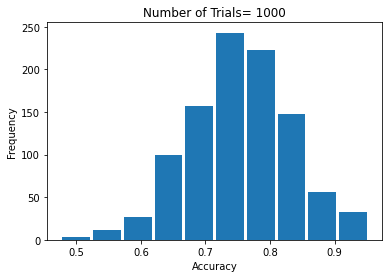

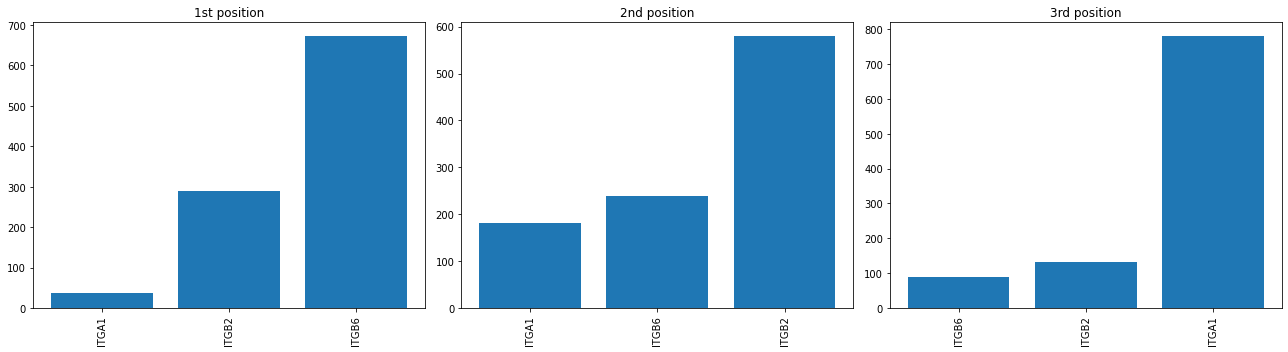

In [19]:
n=1000
accuracy=[]
features_importance_ascendingorder=[]
for iteration in range(n+1):
    X=integrins_rna_skin[['ITGB2','ITGB6','ITGA1']]
    y=integrins_rna_skin['primary_or_metastasis']
    #Scale data
    scaler = StandardScaler()
    scaler.fit(X) 
    X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
#    print("The classifier Accuracy: ", accuracy_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))
    feature_importance = abs(classifier.coef_[0])
    feature_importance =feature_importance / feature_importance.max()
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    features_importance_ascendingorder.append(X.columns[sorted_idx])
#below code draws a bar chart of feature importances
    #featfig = plt.figure(figsize=(10,10))
    #featax = featfig.add_subplot(1, 1, 1)
    #featax.barh(pos, feature_importance[sorted_idx], align='center')
    #featax.set_yticks(pos)
    #featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
    #featax.set_xlabel('Relative Feature Importance',fontsize=15)
    #plt.tight_layout()
# accuracy histogram
#print(features_importance_ascendingorder)
plt.hist(accuracy,rwidth=0.9)
plt.title('Number of Trials= '+str(n),)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
first_important=[]
second_important=[]
third_important=[]
#features
import collections
for list_ in features_importance_ascendingorder:
    first_important.append(list_[-1])
    second_important.append(list_[-2])
    third_important.append(list_[-3])
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,5))
c=collections.Counter(first_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[0].bar(c.keys(),c.values())
ax[0].set_title('1st position')
c=collections.Counter(second_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[1].bar(c.keys(),c.values())
ax[1].set_title('2nd position')
c=collections.Counter(third_important)
c={k: v for k, v in sorted(c.items(), key=lambda item: item[1])}
ax[2].bar(c.keys(),c.values())
ax[2].set_title('3rd position')
plt.draw()

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
plt.tight_layout()


# brain cancer

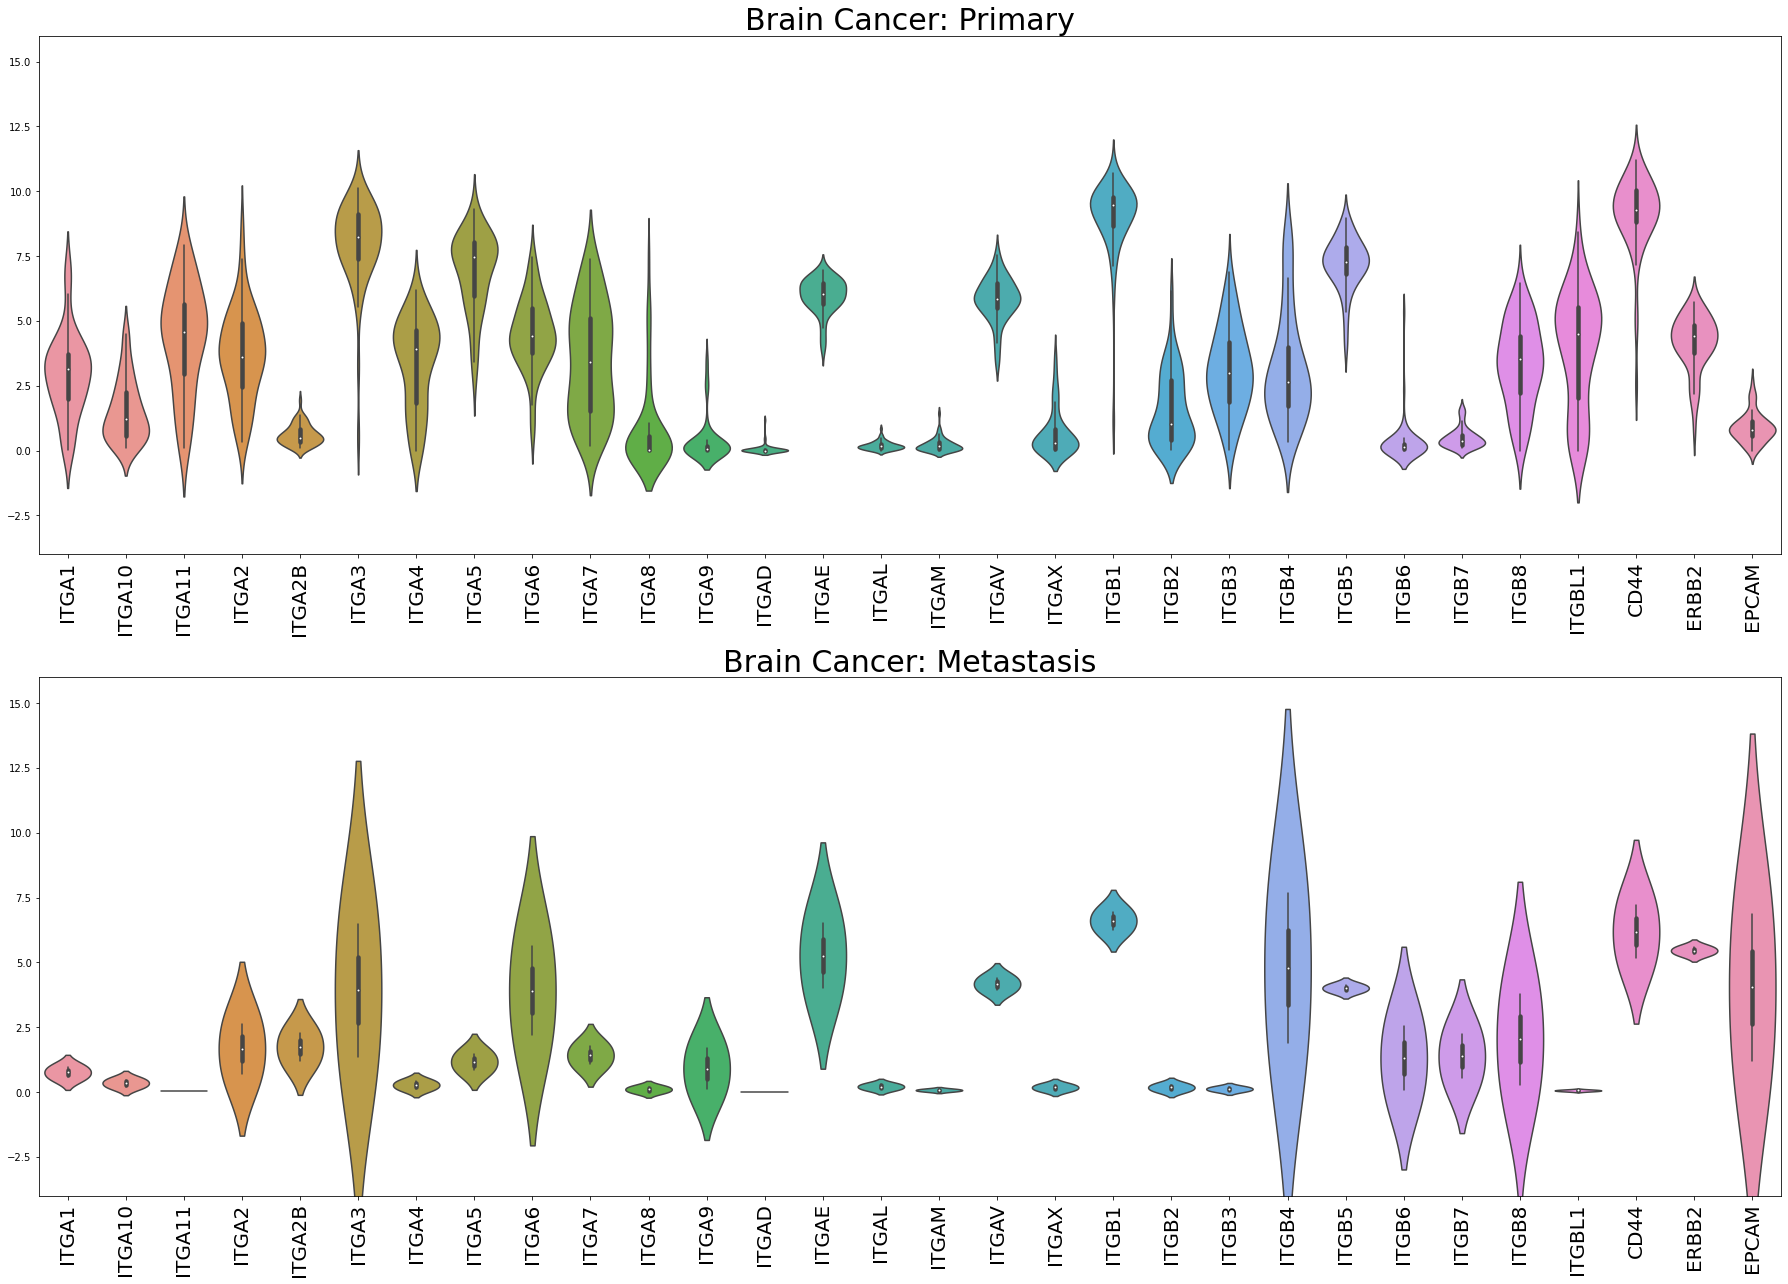

In [15]:
fig, axes = plt.subplots(nrows=len(integrins_rna_brain.primary_or_metastasis.unique()),ncols=1,figsize=(25,18))
j=0
for cancer_status in integrins_rna_brain.primary_or_metastasis.unique():
    sns.set(style="whitegrid")
    ax=sns.violinplot(data=integrins_rna_brain[integrins_rna_brain.primary_or_metastasis==cancer_status].iloc[:,2:],
                   scale='width',
                 ax=axes[j])
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=20)
    axes[j].set_ylim(-4,16)
    axes[j].set_title(integrins_rna_brain.primary_disease.unique()[0]+': '+str(cancer_status),fontsize=30)
    j+=1
plt.tight_layout()


# naive bayes

# 30% test size

The classifier Accuracy:  0.47368421052631576
Feature ranking:
1. ITGA10 (0.021053)
2. ITGA6 (0.021053)
3. ITGB3 (0.021053)
4. ITGA11 (0.010526)
5. EPCAM (0.000000)
6. ERBB2 (0.000000)
7. ITGA3 (0.000000)
8. ITGA4 (0.000000)
9. ITGA5 (0.000000)
10. ITGA7 (0.000000)
11. ITGA8 (0.000000)
12. ITGA9 (0.000000)
13. ITGAD (0.000000)
14. ITGAE (0.000000)
15. ITGAV (0.000000)
16. ITGAM (0.000000)
17. ITGA2 (0.000000)
18. ITGAX (0.000000)
19. ITGB1 (0.000000)
20. ITGB4 (0.000000)
21. ITGB5 (0.000000)
22. ITGB6 (0.000000)
23. ITGB7 (0.000000)
24. ITGBL1 (0.000000)
25. CD44 (0.000000)
26. ITGA2B (0.000000)
27. ITGAL (-0.010526)
28. ITGB8 (-0.010526)
29. ITGA1 (-0.021053)
30. ITGB2 (-0.031579)


(-1.0, 30.0)

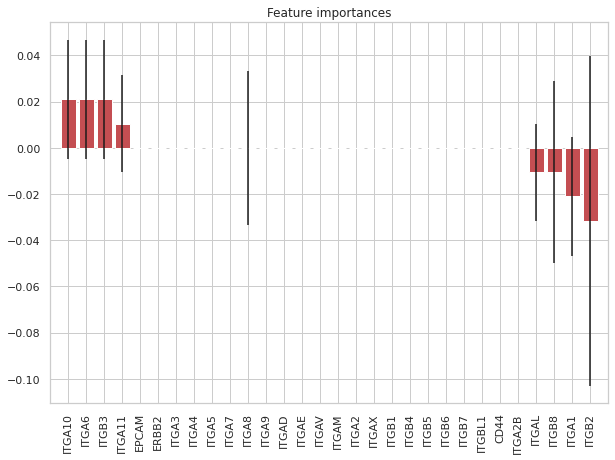

In [186]:
X=integrins_rna_breast.iloc[:,2:]
y=integrins_rna_breast['primary_or_metastasis']
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("The classifier Accuracy: ", sklearn.metrics.accuracy_score(y_test,y_pred))
#feature_importances_df = pd.DataFrame({"feature": list(X.columns),"importance": classifier.feature_log_prob_[1]}).sort_values("importance",ascending=False)

imps = permutation_importance(classifier, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
#print(importances)
# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_test.columns[indices[f]], importances[indices[f]]))

plt.figure(figsize=(10, 7))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), [X_test.columns[indices[i]] for i in range(len(indices))],rotation=90)
plt.xlim([-1, X_test.shape[1]])


    

# MLP classifier 

In [172]:
data=integrins_rna_breast.copy()
X=integrins_rna_breast[['ITGB8','ITGB6','ITGB1','ITGAE','ITGA8']]
y=integrins_rna_breast['primary_or_metastasis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
labelencoder = LabelEncoder()
data["primary_or_metastasis"] = labelencoder.fit_transform(data["primary_or_metastasis"])
primary_or_metastasis = pd.DataFrame({'primary_or_metastasis': data.primary_or_metastasis.unique()})
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
data = create_dummies(data,"primary_or_metastasis")
# Features before mean normalization
unscaled_features = X_train
# Mean Normalization to have a faster classifier 

sc = StandardScaler()
#calculate μ & σ(fit) and apply the transformation(transform)
X_train_array = sc.fit_transform(X_train.values)
# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
# Center test data with the μ & σ computed (fitted) on training data
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)



classifier = MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9, 
beta_2=0.999, early_stopping=False, epsilon=1e-08,       
hidden_layer_sizes=(50,50,50), learning_rate='constant',      
learning_rate_init=0.01, max_iter=5000, momentum=0.9,       
nesterovs_momentum=True, power_t=0.5, random_state=None,       
shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,       
verbose=False, warm_start=False)

classifier.fit(X_train, y_train)

print('the accuracy score is: ',classifier.score(X_test,y_test))
y_pred = classifier.predict(X_test)


the accuracy score is:  0.3157894736842105


In [96]:
y_pred

array(['Metastasis', 'Metastasis', 'Metastasis', 'Metastasis', 'Primary',
       'Metastasis', 'Metastasis', 'Primary', 'Metastasis', 'Primary',
       'Primary', 'Metastasis', 'Metastasis', 'Metastasis', 'Metastasis',
       'Primary', 'Metastasis', 'Primary', 'Primary', 'Metastasis',
       'Metastasis', 'Metastasis', 'Primary', 'Primary', 'Metastasis',
       'Metastasis', 'Metastasis', 'Metastasis', 'Primary', 'Metastasis',
       'Primary', 'Primary', 'Metastasis', 'Primary', 'Metastasis',
       'Primary', 'Primary', 'Primary', 'Primary', 'Metastasis',
       'Primary', 'Primary', 'Primary', 'Metastasis', 'Metastasis',
       'Metastasis', 'Metastasis', 'Metastasis', 'Metastasis',
       'Metastasis', 'Metastasis', 'Primary', 'Primary', 'Primary',
       'Metastasis', 'Primary', 'Metastasis', 'Primary'], dtype='<U10')

In [168]:
y_test

stripped_cell_line_name
ZR7530      Metastasis
HCC202         Primary
HCC1806        Primary
SKBR3       Metastasis
T47D        Metastasis
HCC1954        Primary
HCC38          Primary
SUM149PT       Primary
UACC893        Primary
BT549          Primary
HCC1569        Primary
ZR751       Metastasis
MDAMB361    Metastasis
Name: primary_or_metastasis, dtype: object